<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Separating-Companies-with-Stock-Splits" data-toc-modified-id="Separating-Companies-with-Stock-Splits-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Separating Companies with Stock Splits</a></span></li><li><span><a href="#Processing" data-toc-modified-id="Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing</a></span></li><li><span><a href="#Grouping-Companies-by-Tick-Sizes" data-toc-modified-id="Grouping-Companies-by-Tick-Sizes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Grouping Companies by Tick Sizes</a></span></li><li><span><a href="#Forming-Portfolios" data-toc-modified-id="Forming-Portfolios-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Forming Portfolios</a></span></li><li><span><a href="#$R_t-=-\beta_0-+-\beta_1-R_{t-1}-+-\beta_2-V_{t-1}-+-\beta_3-¥V_{t-1}$" data-toc-modified-id="$R_t-=-\beta_0-+-\beta_1-R_{t-1}-+-\beta_2-V_{t-1}-+-\beta_3-¥V_{t-1}$-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>$R_t = \beta_0 + \beta_1 R_{t-1} + \beta_2 V_{t-1} + \beta_3 ¥V_{t-1}$</a></span><ul class="toc-item"><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Daily-then-Averaging" data-toc-modified-id="Daily-then-Averaging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Daily then Averaging</a></span></li><li><span><a href="#Whole-Period" data-toc-modified-id="Whole-Period-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Whole Period</a></span></li></ul></li><li><span><a href="#Panel-Analysis" data-toc-modified-id="Panel-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Panel Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Plot" data-toc-modified-id="Time-Series-Plot-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Time Series Plot</a></span></li><li><span><a href="#Panel-Analysis" data-toc-modified-id="Panel-Analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Panel Analysis</a></span></li><li><span><a href="#Define-Function-for-Collecting-Panel-Analysis-Results" data-toc-modified-id="Define-Function-for-Collecting-Panel-Analysis-Results-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define Function for Collecting Panel Analysis Results</a></span></li><li><span><a href="#Collecting-Panel-Analysis-Results-for-All-Intervals" data-toc-modified-id="Collecting-Panel-Analysis-Results-for-All-Intervals-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Collecting Panel Analysis Results for All Intervals</a></span></li><li><span><a href="#Counting-Number-of-Firms-in-Each-Price-Stage" data-toc-modified-id="Counting-Number-of-Firms-in-Each-Price-Stage-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Counting Number of Firms in Each Price Stage</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Testing</a></span></li><li><span><a href="#Random-Effect-Model-for-a-Single-Time-Interval" data-toc-modified-id="Random-Effect-Model-for-a-Single-Time-Interval-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Random Effect Model for a Single Time Interval</a></span></li><li><span><a href="#Fama-MacBeth-Model" data-toc-modified-id="Fama-MacBeth-Model-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Fama-MacBeth Model</a></span></li></ul></li><li><span><a href="#Gathering-$R^2$-and-Coefficients" data-toc-modified-id="Gathering-$R^2$-and-Coefficients-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gathering $R^2$ and Coefficients</a></span></li></ul></div>

In [8]:
# Import Modules 
import pandas as pd
import numpy as np
import math
import datetime
import statistics

import os
from tqdm import tqdm
from tqdm import trange

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import FamaMacBeth
from linearmodels.panel import PooledOLS
import statsmodels.api as sm  # Adding constant
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# from jupyterthemes import jtplot
# jtplot.style()

import warnings
warnings.filterwarnings('ignore')

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics(ip))

# from notify_run import Notify
# notify = Notify()
# notify.register()

<IPython.core.display.Javascript object>

# Separating Companies with Stock Splits

In [2]:
stk_splt_co = pd.read_csv('/Volumes/LaCie/Relevant Stock Splits.csv')

In [3]:
stk_splt_co

,Unnamed: 0,Last Dividend Date,Dividend Paying Date,Code,Company Name,Exchange,Split Rate,Sellable Date,Other Infomation
0,0,2013/9/25,2013/9/26,1605,国際帝石,東証一部,1:400,2013/9/26,NaN
1,1,2014/3/26,2014/3/27,4503,アステラス薬,東証一部,1:5,2014/3/27,NaN
2,2,2014/3/26,2014/3/27,6594,日本電産,東証一部,1:2,2014/3/27,NaN
3,3,2013/9/25,2013/9/26,6971,京セラ,東証一部,1:2,2013/9/26,NaN
4,4,2014/9/25,2014/9/26,8113,ユニチャーム,東証一部,1:3,2014/9/26,NaN
5,6,2013/9/25,2013/9/26,8750,第一生命,東証一部,1:100,2013/9/26,NaN
6,8,2013/9/25,2013/9/26,9437,ＮＴＴドコモ,東証一部,1:100,2013/9/26,NaN


In [111]:
%%notify
for yr in ['2013','2014']:
    path = '/Volumes/LaCie/Transactions_%s'%yr
    files = []
    for fpathe, dirs,fs in os.walk(path):
        for f in fs:
            if f[-5:]!= 'Store':
                files.append(os.path.join(fpathe,f))
    for f in files:
        if int(f[-9:-5]) in list(stk_splt_co['Code']):
            path = '/Volumes/LaCie/Stock_Splits/Trasactions/%s'%f[28:-10]
            if not os.path.exists(path):
                os.makedirs(path)
            os.rename(f, '%s/%s'%(path,f[-9:])) 

<IPython.core.display.Javascript object>

# Processing

1. Reading 'Date','Issue code','Time','Price','Trading volume', and 'Closing price input flag' from transaction data. 
2. Separating 'Time' into 'Hour', 'Minute', 'Second', and 'Millisecond', and transform from string to numeric. 
3. Calculating natural log return. 
4. Calculating Yen volume (without unit change) for each transaction.
5. Calculating Amihud Illiquidity (without unit change) for each transaction. 
6. Estimating whether a particular trade was buyer- or seller-initiated and coding 1 for buyer and 2 for seller. 
7. Calculating OIB-# and OIB-¥. 
8. Saving to files according to date (pre/post phase 1/2).

In [2]:
# Abandoned
def pre_process(f):
    df = pd.read_csv(f)[['Date','Issue code','Time','Price','Trading volume','Closing price input flag']]
    df = df.rename(columns={"Issue code":"Code", 'Trading volume':'Volume'})
    
    c = pd.Series(map(int.__add__, df.iloc[:,2], (df.iloc[:,0])*10**9))
    col_1 = pd.to_datetime(c, format='%Y%m%d%H%M%S%f', errors='ignore')
    df['DateTime'] = col_1


    
#     hour=[];minute=[];sec=[];milsec=[]
#     for i in range(len(df)):
#         hour.append(str(df.Time[i])[:-7])
#         minute.append(str(df.Time[i])[-7:-5])
#         sec.append(str(df.Time[i])[-5:-3])
#         milsec.append(str(df.Time[i])[-3:])
#     df['Hour'] = hour
#     df['Minute'] = minute
#     df['Second'] = sec
#     df['Millisecond'] = milsec
#     df.Hour = pd.to_numeric(df.Hour, errors='coerce')
#     df.Minute = pd.to_numeric(df.Minute, errors='coerce')
#     df.Second = pd.to_numeric(df.Second, errors='coerce')
#     df.Millisecond = pd.to_numeric(df.Millisecond, errors='coerce')

    
    def tick_size(df):
        ts =[]
        for i in range(len(df)):
            if df['DateTime'][0] < datetime.datetime(2014,1,14,8,0,0):
                if df.Price[i] <= 3000:
                    ts.append(1)
                elif df.Price[i] <= 5000:
                    ts.append(5)
                elif df.Price[i] <= 30000:
                    ts.append(10)
                elif df.Price[i] <= 50000:
                    ts.append(50)
                elif df.Price[i] <= 300000:
                    ts.append(100)
                elif df.Price[i] <= 500000:
                    ts.append(500)
                elif df.Price[i] <= 1000000:
                    ts.append(1000)
                else:
                    ts.append(np.nan) 
            elif (df['DateTime'][0] >= datetime.datetime(2014,1,14,8,0,0)) & (df['DateTime'][0] < datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                elif df.Price[i] <= 500000:
                    ts.append(50)
                elif df.Price[i] <= 1000000:
                    ts.append(100)
                else:
                    ts.append(np.nan)
            elif (df['DateTime'][0] >= datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 1000:
                    ts.append(0.1)
                elif df.Price[i] <= 5000:
                    ts.append(0.5)
                elif df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                elif df.Price[i] <= 500000:
                    ts.append(50)
                elif df.Price[i] <= 1000000:
                    ts.append(100)
                else:
                    ts.append(np.nan)
        return ts
    
    ts = tick_size(df)
    df['Tick Size'] = ts
    
    
    
    ret = [np.nan]
    for i in range(1, len(df)):
        ret.append(math.log(float(df['Price'][i])/float(df['Price'][i-1])))
    
    df['Return'] = ret

    df['Yen Volume'] = df['Volume']*df['Price']

    df['Illiquidity'] = abs(df['Return'])/df['Yen Volume']

    oib = [np.nan]
    for i in range(1, len(df)):
        if float(df['Price'][i-1]) < float(df['Price'][i]):           # Buyer innitiated order
            oib.append(1)
        elif float(df['Price'][i-1]) > float(df['Price'][i]):         # Seller innitiated order
            oib.append(2)
        else:
            oib.append(0)                
    df['OIB Sign'] = oib

    buyer_num = []; seller_num = []; buyer_yen = []; seller_yen = []; buyer_shr = []; seller_shr = []
    for i in range(len(df)):
        if float(df['OIB Sign'][i])==1:
            buyer_num.append(float(df['OIB Sign'][i]))
            buyer_yen.append(float(df['OIB Sign'][i])*float(df['Price'][i]))
            buyer_shr.append(float(df['OIB Sign'][i])*float(df['Volume'][i]))
        else:
            buyer_num.append(0)
            buyer_yen.append(0)
            buyer_shr.append(0)
        if float(df['OIB Sign'][i])==2:
            seller_num.append(float(df['OIB Sign'][i])/2)
            seller_yen.append(float(df['OIB Sign'][i])/2*float(df['Price'][i]))
            seller_shr.append(float(df['OIB Sign'][i])/2*float(df['Volume'][i]))
        else:
            seller_num.append(0)
            seller_yen.append(0)
            seller_shr.append(0)
    df['Buyer #'] = buyer_num
    df['Seller #'] = seller_num
    df['Buyer Yen'] = buyer_yen
    df['Seller Yen'] = seller_yen
    df['Buyer Share'] = buyer_shr
    df['Seller Share'] = seller_shr
    
    # Saving to ~/Pre_processed 
    if df['Date'][0] < 20140114:
        path = '/Volumes/LaCie/Pre_processed/Pre_Phase_1/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    elif df['Date'][0] >= 20140722:
        path = '/Volumes/LaCie/Pre_processed/Post_Phase_2/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    else:
        path = '/Volumes/LaCie/Pre_processed/Post_Phase_1/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False) # Previously used 

In [2]:
# Abandoned
def time_process(f):
    df = pd.read_csv(f)
    c = pd.Series(map(int.__add__, df.iloc[:,2], (df.iloc[:,0])*10**9))
    col_1 = pd.to_datetime(c, format='%Y%m%d%H%M%S%f', errors='ignore')
    df['DateTime'] = col_1
    
    df_am = df[(df['DateTime']>=datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),9,0,0)) &
               (df['DateTime']<datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),11,30,0))]
    df_am.reset_index(inplace = True, drop = True)
    df_pm = df[(df['DateTime']>=datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),12,30,0)) & 
               (df['DateTime']<datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),15,0,0))]
    df_pm.reset_index(inplace = True, drop = True)
    
    df_am = df_am.drop([0])
    df_pm = df_pm.drop([0])
    
    df = pd.concat([df_am, df_pm], axis =0)
    df.reset_index(inplace = True, drop = True)
  
    def tick_size(df):
        ts =[]
        for i in range(len(df)):
            if df['DateTime'][0] < datetime.datetime(2014,1,14,8,0,0):
                if df.Price[i] <= 3000:
                    ts.append(1)
                elif df.Price[i] <= 5000:
                    ts.append(5)
                elif df.Price[i] <= 30000:
                    ts.append(10)
                elif df.Price[i] <= 50000:
                    ts.append(50)
                elif df.Price[i] <= 100000:
                    ts.append(100)
                else:
                    ts.append(np.nan) 

            elif (df['DateTime'][0] >= datetime.datetime(2014,1,14,8,0,0)) & (df['DateTime'][0] < datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                else:
                    ts.append(np.nan)
            elif (df['DateTime'][0] >= datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 1000:
                    ts.append(0.1)
                elif df.Price[i] <= 5000:
                    ts.append(0.5)
                elif df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                else:
                    ts.append(np.nan)

        return ts
    ts = tick_size(df)
    df['Tick Size'] = ts
    
    am_b = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),9,0,0)
    am_e = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),11,29,0)
    am = pd.date_range(am_b, am_e, freq="1min")
    pm_b = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),12,30,0)
    pm_e = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),14,59,0)
    pm = pd.date_range(pm_b, pm_e, freq="1min")
    full = am.append(pm)

    TMP = pd.DataFrame({'Code':[df['Code'][1]]*len(full), 'DateTime':full}).set_index('DateTime')

    TMP_sum = pd.DataFrame([])
    for t in ['01','05','10','15','30','45','60']:
        date_time = []
        high = []; low = []; opening = []; closing = []; tick_size = []
        trans_num = []; volume = []; ret = []; yen_volume = []; ilqd = []; volatility = []
        oib_num = []; oib_yen = []; oib_shr = []

        am_e_tmp = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),11,30,0)-\
                                                                        datetime.timedelta(minutes=int(t))
        range_am = pd.date_range(am_b, am_e_tmp, freq="1min")
        pm_e_tmp = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),15,0,0)-\
                                                                        datetime.timedelta(minutes=int(t))
        range_pm = pd.date_range(pm_b, pm_e_tmp, freq="1min")    
        range_full = range_am.append(range_pm)    

        for i in range (len(range_full)):
            t_b = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),
                                    range_full[i].hour, range_full[i].minute,0)
            t_e = datetime.datetime(int(f[-18:-14]),int(f[-14:-12]),int(f[-12:-10]),
                                    range_full[i].hour, range_full[i].minute,0) + \
                                    datetime.timedelta(minutes=int(t))
            date_time.append(t_b)
            tmp = df[(df['DateTime']>=t_b) & (df['DateTime']<t_e)]
            tmp.reset_index(inplace = True, drop = True)

            trans_num.append(len(tmp))
            volume.append(np.nansum(tmp['Volume']))
            yen_volume.append(np.nansum(tmp['Yen Volume']))

            ret.append(np.nan if tmp.empty else np.nansum(tmp['Return']))
            ret = [0 if math.isnan(x) else x for x in ret]

            ilqd.append(np.nan if tmp.empty else np.nansum(tmp['Illiquidity']))

            volatility.append(np.nan if tmp.empty else np.nanstd(tmp['Return'])*(len(tmp)**0.5))
            volatility = [0 if math.isnan(x) else x for x in volatility]

            oib_num.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer #'])-np.nansum(tmp['Seller #']))/len(tmp))
            oib_yen.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer Yen'])-np.nansum(tmp['Seller Yen']))/np.nansum(tmp['Yen Volume']))
            oib_shr.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer Share'])-np.nansum(tmp['Seller Share']))/np.nansum(tmp['Volume']))

            high.append(max(tmp['Price'], default=np.nan))
            low.append(min(tmp['Price'], default=np.nan))
            opening.append(np.nan if tmp.empty else tmp['Price'][0])
            closing.append(np.nan if tmp.empty else tmp['Price'][len(tmp)-1])

            tick_size.append(np.nan if tmp.empty else np.nanmean(tmp['Tick Size']))
            
            TMP_single = pd.DataFrame({
                        'DateTime':date_time,
                        'High-%s'%t:high, 'Low-%s'%t:low, 'Open-%s'%t:opening, 'Close-%s'%t:closing,
                        'Tick Size-%s'%t:tick_size,
                        'Transactions-%s'%t:trans_num, 'Volume-%s'%t:volume, 'Return-%s'%t:ret, 
                        'Volume Yen-%s'%t:yen_volume, 'Illiquidity-%s'%t:ilqd,'Return Volatility-%s'%t:volatility, 
                        'OIB #-%s'%t:oib_num, 'OIB shr-%s'%t:oib_shr, 'OIB Yen-%s'%t:oib_yen
                        }).set_index('DateTime')

        TMP_sum = pd.concat([TMP_sum,TMP_single], axis = 1)

    TMP = pd.concat([TMP,TMP_sum], axis = 1).reset_index()

    if df['Date'][0] < 20140114:
        path = '/Volumes/LaCie/Time_interval_processed/Pre_Phase_1/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    elif df['Date'][0] >= 20140722:
        path = '/Volumes/LaCie/Time_interval_processed/Post_Phase_2/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    else:
        path = '/Volumes/LaCie/Time_interval_processed/Post_Phase_1/%s'%(str(df['Date'][0]))
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False) # Previously used 

In [9]:
def _process(f):
#     Reading Data
    df = pd.read_csv(f)[['Issue code','Date','Time','Price','Trading volume']]
    df = df.rename(columns={"Issue code":"Code", 'Trading volume':'Volume'})

    c = pd.Series(map(int.__add__, df.iloc[:,2], (df.iloc[:,1])*10**9))
    col_1 = pd.to_datetime(c, format='%Y%m%d%H%M%S%f', errors='ignore')
    df['DateTime'] = col_1

#     Estimating Tick Size
    def tick_size(df):
        ts =[]
        for i in range(len(df)):
            if df['DateTime'][0] < datetime.datetime(2014,1,14,8,0,0):
                if df.Price[i] <= 3000:
                    ts.append(1)
                elif df.Price[i] <= 5000:
                    ts.append(5)
                elif df.Price[i] <= 30000:
                    ts.append(10)
                elif df.Price[i] <= 50000:
                    ts.append(50)
                elif df.Price[i] <= 300000:
                    ts.append(100)
                elif df.Price[i] <= 500000:
                    ts.append(500)
                elif df.Price[i] <= 1000000:
                    ts.append(1000)
                else:
                    ts.append(np.nan) 
            elif (df['DateTime'][0] >= datetime.datetime(2014,1,14,8,0,0)) & (df['DateTime'][0] < datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                elif df.Price[i] <= 500000:
                    ts.append(50)
                elif df.Price[i] <= 1000000:
                    ts.append(100)
                else:
                    ts.append(np.nan)
            elif (df['DateTime'][0] >= datetime.datetime(2014,7,22,8,0,0)):
                if df.Price[i] <= 1000:
                    ts.append(0.1)
                elif df.Price[i] <= 5000:
                    ts.append(0.5)
                elif df.Price[i] <= 10000:
                    ts.append(1)
                elif df.Price[i] <= 50000:
                    ts.append(5)
                elif df.Price[i] <= 100000:
                    ts.append(10)
                elif df.Price[i] <= 500000:
                    ts.append(50)
                elif df.Price[i] <= 1000000:
                    ts.append(100)
                else:
                    ts.append(np.nan)
        return ts
    ts = tick_size(df)
    df['Tick Size'] = ts
    
    df['Yen Volume'] = df['Volume']*df['Price']/1000000000    # Billion Yen

#     Calculating OIB
    oib = [np.nan]
    for i in range(1, len(df)):
        if float(df['Price'][i-1]) < float(df['Price'][i]):           # Buyer innitiated order
            oib.append(1)
        elif float(df['Price'][i-1]) > float(df['Price'][i]):         # Seller innitiated order
            oib.append(2)
        else:
            oib.append(0)                
    df['OIB Sign'] = oib

    buyer_num = []; seller_num = []; buyer_yen = []; seller_yen = []; buyer_shr = []; seller_shr = []
    for i in range(len(df)):
        if float(df['OIB Sign'][i])==1:
            buyer_num.append(float(df['OIB Sign'][i]))
            buyer_yen.append(float(df['OIB Sign'][i])*float(df['Price'][i]))
            buyer_shr.append(float(df['OIB Sign'][i])*float(df['Volume'][i]))
        else:
            buyer_num.append(0)
            buyer_yen.append(0)
            buyer_shr.append(0)
        if float(df['OIB Sign'][i])==2:
            seller_num.append(float(df['OIB Sign'][i])/2)
            seller_yen.append(float(df['OIB Sign'][i])/2*float(df['Price'][i]))
            seller_shr.append(float(df['OIB Sign'][i])/2*float(df['Volume'][i]))
        else:
            seller_num.append(0)
            seller_yen.append(0)
            seller_shr.append(0)
    df['Buyer #'] = buyer_num
    df['Seller #'] = seller_num
    df['Buyer Yen'] = buyer_yen
    df['Seller Yen'] = seller_yen
    df['Buyer Share'] = buyer_shr
    df['Seller Share'] = seller_shr
    
#     Removing the 1st & Last Transactions for Each Session
    df_am = df[(df['DateTime']>=datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),9,0,0)) &
               (df['DateTime']<datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),11,30,0))]
    df_am.reset_index(inplace = True, drop = True)
    df_pm = df[(df['DateTime']>=datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),12,30,0)) & 
               (df['DateTime']<datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),15,0,0))]
    df_pm.reset_index(inplace = True, drop = True)

    df_am = df_am.drop([0])
    df_pm = df_pm.drop([0])

    df = pd.concat([df_am, df_pm], axis =0)
    df.reset_index(inplace = True, drop = True)
    df = df.drop(columns=['Date','Time', 'OIB Sign'])
    
#     Creating a DateTime Column
    am_b = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),9,0,0)
    am_e = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),11,29,0)
    am = pd.date_range(am_b, am_e, freq="1min")
    pm_b = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),12,30,0)
    pm_e = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),14,59,0)
    pm = pd.date_range(pm_b, pm_e, freq="1min")
    full = am.append(pm)

#     Constructing an empty Dataframe with Code and DateTime
    TMP = pd.DataFrame({'Code':[df['Code'][1]]*len(full), 'DateTime':full}).set_index('DateTime')
    
#     Summarising High, Low, Opening, Closing, and Tick Size
    date_time = []
    high = []; low = []; opening = []; closing = []
    tick_size = []
    for i in range (len(full)):
        t_b = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),
                                full[i].hour, full[i].minute,0)
        t_e = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),
                                full[i].hour, full[i].minute,0) + datetime.timedelta(minutes=1)    
        date_time.append(t_b)
        tmp = df[(df['DateTime']>=t_b) & (df['DateTime']<t_e)]
        tmp.reset_index(inplace = True, drop = True)

        high.append(max(tmp['Price'], default=np.nan))
        low.append(min(tmp['Price'], default=np.nan))
        opening.append(np.nan if tmp.empty else tmp['Price'][0])
        closing.append(np.nan if tmp.empty else tmp['Price'][len(tmp)-1])

        tick_size.append(np.nan if tmp.empty else np.nanmean(tmp['Tick Size']))

    hloc = pd.DataFrame({'DateTime':date_time, 
                         'High':high, 'Low':low, 'Open':opening, 'Close':closing, 
                         'Tick Size':tick_size}).set_index('DateTime')

#     Calculating Yang-Zhang Volatilities for time intervals
    def _yz(n,N,df):
        k = (0.34*(n-1))/(2*n)

        log_Oc = (df['Open'] / df['Close'].shift(1)).apply(np.log)

        def f1(v):
            return (statistics.variance(v))*N

        var_overnight =  pd.DataFrame(log_Oc).rolling(window=n, center=False).apply(func=f1)

        log_CO = (df['Close'] /df['Open']).apply(np.log)
        var_cl2op = pd.DataFrame(log_CO).rolling(window=n, center=False).apply(func=f1)

        log_HC = (df['High'] / df['Close']).apply(np.log)
        log_HO = (df['High'] / df['Open']).apply(np.log)
        log_LC = (df['Low'] / df['Close']).apply(np.log)
        log_LO = (df['Low'] / df['Open']).apply(np.log)

        log_rs = log_HC*log_HO + log_LC*log_LO
        var_rs = pd.DataFrame(log_rs).rolling(window=n, center=False).mean()*N

        vol_yz = (var_overnight + k*var_cl2op + (1-k)*var_rs)**0.5

        return vol_yz
    
    YZ_vol = pd.DataFrame({'DateTime':date_time}).set_index('DateTime')
    for t in ['05','10','15','30','45','60']:
        yz_vol = _yz(int(t),len(full),hloc)
        yz_vol.rename(columns={0:'YZ-%s'%t}, inplace=True )
        YZ_vol = pd.concat([YZ_vol, yz_vol], axis = 1)

#     Calculating Transaction Numbers, Volume, Yen Volume, Return, Illiquidity, and OIB for time intervals
    TMP_sum = pd.DataFrame([])
    for t in ['01','05','10','15','30','45','60']:
        date_time = []
        trans_num = []; volume = []; yen_volume = []
        ret = []; ilqd = []
        oib_num = []; oib_yen = []; oib_shr = []

        am_e_tmp = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),11,30,0)-\
                                                                        datetime.timedelta(minutes=int(t))
        range_am = pd.date_range(am_b, am_e_tmp, freq="1min")
        pm_e_tmp = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),15,0,0)-\
                                                                        datetime.timedelta(minutes=int(t))
        range_pm = pd.date_range(pm_b, pm_e_tmp, freq="1min")    
        range_full = range_am.append(range_pm)    

        for i in range (len(range_full)):
            t_b = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),
                                    range_full[i].hour, range_full[i].minute,0)
            t_e = datetime.datetime(int(f[-20:-16]),int(f[-15:-13]),int(f[-12:-10]),
                                    range_full[i].hour, range_full[i].minute,0) + \
                                    datetime.timedelta(minutes=int(t))
            date_time.append(t_b)
            tmp = df[(df['DateTime']>=t_b) & (df['DateTime']<t_e)]
            tmp.reset_index(inplace = True, drop = True)

            trans_num.append(len(tmp))
            volume.append(np.nansum(tmp['Volume']))

            y_v = np.nansum(tmp['Yen Volume'])
            yen_volume.append(y_v)

            rt = 0 if tmp.empty else np.log(float(tmp['Price'].iloc[-1])/float(tmp['Price'].iloc[0]))
            ret.append(rt)

            ilqd.append(np.nan if tmp.empty else abs(rt)/y_v)

            oib_num.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer #'])-np.nansum(tmp['Seller #']))/len(tmp))
            oib_yen.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer Yen'])-np.nansum(tmp['Seller Yen']))/np.nansum(tmp['Yen Volume']))
            oib_shr.append(np.nan if tmp.empty 
                           else (np.nansum(tmp['Buyer Share'])-np.nansum(tmp['Seller Share']))/np.nansum(tmp['Volume']))

            TMP_single = pd.DataFrame({
                        'DateTime':date_time,
                        'Transactions-%s'%t:trans_num, 'Volume-%s'%t:volume, 'Volume Yen-%s'%t:yen_volume, 
                        'Return-%s'%t:ret, 'Illiquidity-%s'%t:ilqd, 
                        'OIB #-%s'%t:oib_num, 'OIB shr-%s'%t:oib_shr, 'OIB Yen-%s'%t:oib_yen
                        }).set_index('DateTime')

        TMP_sum = pd.concat([TMP_sum,TMP_single], axis = 1)

#     Calculating Close-to-Close Return Volatilities for time intervals
    def _cc(n,N,df):
        def f3(v):
            return statistics.stdev(v)*(N)**0.5
        vol_cc = pd.DataFrame(df).rolling(window=n-1, center=False).apply(func=f3)
        return vol_cc
    
    CC_vol = pd.DataFrame({'DateTime':date_time}).set_index('DateTime')
    for t in ['05','10','15','30','45','60']:
        cc_vol = _cc(int(t),len(full),TMP_sum['Return-01'])
        cc_vol.rename(columns={'Return-01':'CC-%s'%t}, inplace=True )
        CC_vol = pd.concat([CC_vol, cc_vol], axis = 1)
    
#     Summarising to One DataFrame
    TMP = pd.concat([TMP,hloc,YZ_vol,CC_vol,TMP_sum], axis = 1).reset_index()
    
#     Saving to .csv File
    if date_time[0] < datetime.datetime(2014,1,14,8,0,0):
        path = '/Volumes/LaCie/Processed/Pre_Phase_1/%s'%(str(date_time[0])[:-9])
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    elif date_time[0] >= datetime.datetime(2014,7,22,8,0,0):
        path = '/Volumes/LaCie/Processed/Post_Phase_2/%s'%(str(date_time[0])[:-9])
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)
    else:
        path = '/Volumes/LaCie/Processed/Post_Phase_1/%s'%(str(date_time[0])[:-9])
        if not os.path.exists(path):
            os.makedirs(path)
        pd.DataFrame(TMP).to_csv('%s/%s.csv'%(path, str(df['Code'][0])), index=False)

In [15]:
_process('/Volumes/LaCie/Transactions_2014/04/09/99840.csv')

In [3]:
%%notify
files =[]
path_13 = '/Volumes/LaCie/Transactions_%s'%('2013')
for fpathe, dirs,fs in os.walk(path_13):
    for f in fs:
        if f[-5:]!= 'Store':
            files.append(os.path.join(fpathe,f))

path_14 = '/Volumes/LaCie/Transactions_%s'%('2014')
for fpathe, dirs,fs in os.walk(path_14):
    for f in fs:
        if f[-5:]!= 'Store':
            files.append(os.path.join(fpathe,f))

<IPython.core.display.Javascript object>

In [4]:
pbar = tqdm(files)
for f in pbar:
    _process(f)
    pbar.set_description("Processing %s" % f[-20:])

Processing 2013/12/04/80310.csv: 100%|██████████| 2010/2010 [5:06:30<00:00,  9.15s/it]  


# Grouping Companies by Tick Sizes

Price (JPY) up to | 2008/07/22 | 2010/01/04 | 2014/01/14 | 2014/07/22 | 2015/09/24
----------------- | ---------- | ---------- | ---------- | ---------- | ----------
1,000  | 1 | 1 | 1 | 0.1 | 0.1  
2,000  | 1 | 1 | 1 | 0.5 | 0.5
3,000  | 5 | 1 | 1 | 0.5 | 0.5
5,000  | 10 | 5 | 1 | 0.5 | 1
10,000  | 10 | 10 | 1 | 1 | 1
30,000  | 10 | 10 | 5 | 5 | 5
50,000  | 50 | 50 | 5 | 5 | 10
100,000  | 100 | 100 | 10 | 10 | 10
300,000  | 100 | 100 | 50 | 50 | 50
500,000  | 1,000 | 500 | 50 | 50 | 100
1 million  | 1,000 | 1,000 | 100 | 100 | 100
3 million  | 1,000 | 1,000 | 500 | 500 | 500
5 million  | 10,000 | 5,000 | 500 | 500 | 1,000
10 million  | 10,000 | 10,000 | 1,000 | 1,000 | 1,000
20 million  | 10,000 | 10,000 | 5,000 | 5,000 | 5,000
30 million  | 50,000 | 10,000 | 5,000 | 5,000 | 5,000
50 million  | 100,000 | 50,000 | 5,000 | 5,000 | 10,000
over 50 million  | 100,000 | 100,000 | 10,000 | 10,000 | 10,000

In [65]:
def _grouping (period):
    files = []
    basepath = '/Volumes/LaCie/Processed/%s'%period
    dates = os.listdir(basepath)

    pbar = tqdm(dates)
    for day in pbar:
        if dates[-5:] != 'Store':
            subpath = basepath +'/'+day
        files=[]
        for fpathe, dirs,fs in os.walk(subpath):
            for f in fs:
                if f[-5:]!= 'Store':
                    files.append(os.path.join(fpathe,f))

        A_1 = []; N_1 = []; A_2 = []; N_2 = []; B_12 = []; O_2 = []
        K_1 = []; K_3 = []; K_5 = []; K_10 = []; K_30 = []; K_50 = []; K_100 = []
        for f in files:
            df = pd.read_csv(f)[['Code','Close']]
            if np.nanmean(df['Close']) <= 3000:     # Not reduced by phase-1
                N_1.append(df['Code'][0])
            else:                                   # Reduced by phase-1
                A_1.append(df['Code'][0])

            if np.nanmean(df['Close']) <= 5000:     # Reduced by phase-2
                A_2.append(df['Code'][0])
            else:                                   # Not reduced by phase-2
                N_2.append(df['Code'][0])

            if np.nanmean(df['Close']) <= 3000:     # Only reduced after phase-2
                O_2.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 5000:   # Reduced by both phase-1&2
                B_12.append(df['Code'][0])


            if np.nanmean(df['Close']) <= 1000:
                K_1.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 3000:
                K_3.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 5000:
                K_5.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 10000:
                K_10.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 30000:
                K_10.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 50000:
                K_50.append(df['Code'][0])
            elif np.nanmean(df['Close']) <= 100000:
                K_100.append(df['Code'][0])  

        for f in files:
            df = pd.read_csv(f)
            df.drop(['High','Low','Open','Tick Size'], axis=1)

            if datetime.datetime.strptime(df['DateTime'][0], '%Y-%m-%d %H:%M:%S') \
                                        < datetime.datetime(2014,1,14,8,0,0):
                df['Post 1']=0
                df['Post 2']=0
            elif datetime.datetime.strptime(df['DateTime'][0], '%Y-%m-%d %H:%M:%S') \
                                        >= datetime.datetime(2014,7,22,8,0,0):
                df['Post 1']=1
                df['Post 2']=1
            else:
                df['Post 1']=1
                df['Post 2']=0

            if np.nanmean(df['Close']) <= 3000:     # Not reduced by phase-1
                df['A_1'] = 0
            else:                                   # Reduced by phase-1
                df['A_1'] = 1

            if np.nanmean(df['Close']) <= 5000:     # Reduced by phase-2
                df['A_2'] = 1
            else:                                   # Not reduced by phase-2
                df['A_2'] = 0

            if np.nanmean(df['Close']) <= 3000:     # Only reduced after phase-2
                df['O_2'] = 1
                df['B_12'] = 0
            elif np.nanmean(df['Close']) <= 5000:   # Reduced by both phase-1&2
                df['O_2'] = 0
                df['B_12'] = 1
            else:
                df['O_2'] = 0
                df['B_12'] = 0

            if np.nanmean(df['Close']) <= 1000:
                df['1K']=1
                df['3K']=0;df['5K']=0;df['10K']=0;df['30K']=0;df['50K']=0;df['100K']=0;
            elif np.nanmean(df['Close']) <= 3000:
                df['1K']=0;df['3K']=1
                df['5K']=0;df['10K']=0;df['30K']=0;df['50K']=0;df['100K']=0;
            elif np.nanmean(df['Close']) <= 5000:
                df['1K']=0;df['3K']=0;df['5K']=1
                df['10K']=0;df['30K']=0;df['50K']=0;df['100K']=0;
            elif np.nanmean(df['Close']) <= 10000:
                df['1K']=0;df['3K']=0;df['5K']=0;df['10K']=1
                df['30K']=0;df['50K']=0;df['100K']=0;
            elif np.nanmean(df['Close']) <= 30000:
                df['1K']=0;df['3K']=0;df['5K']=0;df['10K']=0;df['30K']=1
                df['50K']=0;df['100K']=0;
            elif np.nanmean(df['Close']) <= 50000:
                df['1K']=0;df['3K']=0;df['5K']=0;df['10K']=0;df['30K']=0;df['50K']=1
                df['100K']=0;
            elif np.nanmean(df['Close']) <= 100000:
                df['1K']=0;df['3K']=0;df['5K']=0;df['10K']=0;df['30K']=0;df['50K']=0
                df['100K']=1;

            if datetime.datetime.strptime(df['DateTime'][0], '%Y-%m-%d %H:%M:%S') \
                                        < datetime.datetime(2014,1,14,8,0,0):
                if df['Code'][0] in A_1:
                    path = '/Volumes/LaCie/Grouping_1/Pre_Phase_1/A_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in N_1:
                    path = '/Volumes/LaCie/Grouping_1/Pre_Phase_1/N_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                if df['Code'][0] in K_1:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_3:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_3/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_5:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_5/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_10:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_10/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_30:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_30/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_50:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_50/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_100:
                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_1/K_100/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

            elif datetime.datetime.strptime(df['DateTime'][0], '%Y-%m-%d %H:%M:%S') \
                                        >= datetime.datetime(2014,7,22,8,0,0):

                if df['Code'][0] in A_2:
                    path = '/Volumes/LaCie/Grouping_1/Post_Phase_2/A_2/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                    if df['Code'][0] in O_2:
                        path = '/Volumes/LaCie/Grouping_1/Post_Phase_2/O_2/%s'%(dates)
                        if not os.path.exists(path):
                            os.makedirs(path)
                        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                    elif df['Code'][0] in B_12:
                        path = '/Volumes/LaCie/Grouping_1/Post_Phase_2/B_12/%s'%(dates)
                        if not os.path.exists(path):
                            os.makedirs(path)
                        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)                
                elif df['Code'][0] in N_2:
                    path = '/Volumes/LaCie/Grouping_1/Post_Phase_2/N_2/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)            

                if df['Code'][0] in K_1:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_3:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_3/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_5:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_5/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_10:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_10/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_30:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_30/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_50:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_50/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_100:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_2/K_100/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

            else:
                if df['Code'][0] in A_1:
                    path = '/Volumes/LaCie/Grouping_1/Post_Phase_1/A_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in N_1:
                    path = '/Volumes/LaCie/Grouping_1/Post_Phase_1/N_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                if df['Code'][0] in A_2:
                    path = '/Volumes/LaCie/Grouping_1/Pre_Phase_2/A_2/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                    if df['Code'][0] in O_2:
                        path = '/Volumes/LaCie/Grouping_1/Pre_Phase_2/O_2/%s'%(dates)
                        if not os.path.exists(path):
                            os.makedirs(path)
                        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                    elif df['Code'][0] in B_12:
                        path = '/Volumes/LaCie/Grouping_1/Pre_Phase_2/B_12/%s'%(dates)
                        if not os.path.exists(path):
                            os.makedirs(path)
                        pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)                
                elif df['Code'][0] in N_2:
                    path = '/Volumes/LaCie/Grouping_1/Pre_Phase_2/N_2/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)   

                if df['Code'][0] in K_1:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_1/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_3:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_3/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_3/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_5:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_5/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_5/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_10:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_10/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_10/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_30:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_30/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_30/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_50:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_50/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_50/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
                elif df['Code'][0] in K_100:
                    path = '/Volumes/LaCie/Grouping_2/Post_Phase_1/K_100/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)

                    path = '/Volumes/LaCie/Grouping_2/Pre_Phase_2/K_100/%s'%(dates)
                    if not os.path.exists(path):
                        os.makedirs(path)
                    pd.DataFrame(df).to_csv('%s/%s.csv'%(path, f[-9:-4]), index=False)
        pbar.set_description("Processing %s" % dates)

In [ ]:
parentpath = '/Volumes/LaCie/Processed'
periods = os.listdir(parentpath)
for period in periods:
    if period[-5:] != 'Store':
        _grouping (period)

# Forming Portfolios

In [1]:
def _portfolio(interval):
    A_1 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_1/A_1/2014-01-14')
    N_1 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_1/N_1/2014-01-14')

    A_2 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_2/A_2/2014-07-22')
    B_12 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_2/B_12/2014-07-22')
    O_2 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_2/O_2/2014-07-22')
    N_2 = os.listdir('/Volumes/LaCie/Grouping_1/Post_Phase_2/N_2/2014-07-22')
    
    def _portsum(group,interval,path,groupname,phasename):
        port =[]
        for fpathe, dirs,fs in os.walk(path):
            for f in fs:
                if f[-9:] in group:
                    port.append(os.path.join(fpathe,f))

        port_ret = pd.DataFrame([])
        port_vol = pd.DataFrame([])
        port_YenVol = pd.DataFrame([])
        port_ilqd = pd.DataFrame([])
        port_oib_num = pd.DataFrame([])
        port_oib_shr = pd.DataFrame([])
        port_oib_yen = pd.DataFrame([])
        for i in port:
            df = pd.read_csv(i)[['DateTime','Code',
                     'Return-%s'%interval,'Volume-%s'%interval,'Volume Yen-%s'%interval, 
                     'Illiquidity-%s'%interval, 
                     'OIB #-%s'%interval, 'OIB shr-%s'%interval, 'OIB Yen-%s'%interval]]
            df = df.set_index('DateTime')

            df_ret = pd.DataFrame({i[-9:-4]: df['Return-%s'%interval]})
            df_vol = pd.DataFrame({i[-9:-4]: df['Volume-%s'%interval]})
            df_YenVol = pd.DataFrame({i[-9:-4]: df['Volume Yen-%s'%interval]})
            df_ilqd = pd.DataFrame({i[-9:-4]: df['Illiquidity-%s'%interval]})
            df_oib_num = pd.DataFrame({i[-9:-4]: df['OIB #-%s'%interval]})
            df_oib_shr = pd.DataFrame({i[-9:-4]: df['OIB shr-%s'%interval]})
            df_oib_yen = pd.DataFrame({i[-9:-4]: df['OIB Yen-%s'%interval]})

            port_ret = pd.concat([port_ret, df_ret], axis = 1)
            port_vol = pd.concat([port_vol, df_vol], axis = 1)
            port_YenVol = pd.concat([port_YenVol, df_YenVol], axis = 1)
            port_ilqd = pd.concat([port_ilqd, df_ilqd], axis = 1)
            port_oib_num = pd.concat([port_vol, df_oib_num], axis = 1)
            port_oib_shr = pd.concat([port_YenVol, df_oib_shr], axis = 1)
            port_oib_yen = pd.concat([port_ilqd, df_oib_yen], axis = 1)
            

        port_ret['Portfolio Return']=np.nanmean(port_ret,axis=1)
        port_vol['Portfolio Volume']=np.nanmean(port_vol,axis=1)
        port_YenVol['Portfolio Volume Yen']=np.nanmean(port_YenVol,axis=1)
        port_ilqd['Portfolio Illiquidity']=np.nanmean(port_ilqd,axis=1)
        port_oib_num['Portfolio OIB #']=np.nanmean(port_oib_num,axis=1)
        port_oib_shr['Portfolio OIB shr']=np.nanmean(port_oib_shr,axis=1)
        port_oib_yen['Portfolio OIB Yen']=np.nanmean(port_oib_yen,axis=1)

        savepath = '/Volumes/LaCie/reg_Portfolio/%s/%s/%s/%s'%(
                                                interval,groupname,phasename,path[-10:])
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        pd.DataFrame(port_ret).to_csv('%s/Return.csv'%(savepath))
        pd.DataFrame(port_vol).to_csv('%s/Volume.csv'%(savepath))
        pd.DataFrame(port_YenVol).to_csv('%s/Volume Yen.csv'%(savepath))
        pd.DataFrame(port_ilqd).to_csv('%s/Illiquidity.csv'%(savepath))
        pd.DataFrame(port_oib_num).to_csv('%s/OIB #.csv'%(savepath))
        pd.DataFrame(port_oib_shr).to_csv('%s/OIB shr.csv'%(savepath))
        pd.DataFrame(port_oib_yen).to_csv('%s/OIB Yen.csv'%(savepath))

    for i in ['Pre_Phase_1','Post_Phase_1','Post_Phase_2']:
        basepath = '/Volumes/LaCie/Processed/%s'%i
        paths  = os.listdir(basepath)
        pbar = tqdm(paths)
        for pth in pbar:
            if pth[-5:] != 'Store':
                path = basepath +'/'+pth

                if i == 'Pre_Phase_1':
                    _portsum(A_1,time,path,'A1',i)
                    _portsum(N_1,time,path,'N1',i)
                    pbar.set_description("Processing %s"%(pth))
                elif i == 'Post_Phase_1':
                    _portsum(A_1,time,path,'A1',i)
                    _portsum(N_1,time,path,'N1',i)
                    
                    _portsum(A_2,time,path,'A2','Pre_Phase_2')
                    _portsum(N_2,time,path,'N2','Pre_Phase_2')
                    _portsum(O_2,time,path,'O2','Pre_Phase_2')
                    _portsum(B_12,time,path,'B12','Pre_Phase_2')
                    pbar.set_description("Processing %s"%(pth))
                elif i == 'Post_Phase_2':
                    _portsum(A_2,time,path,'A2',i)
                    _portsum(N_2,time,path,'N2',i)
                    _portsum(O_2,time,path,'O2',i)
                    _portsum(B_12,time,path,'B12',i)
                    pbar.set_description("Processing %s"%(pth))

In [3]:
%%notify
for t in ['01','05','10','15','30','45','60']:
    _portfolio(t)

Processing 2014-12-30: 100%|██████████| 111/111 [08:49<00:00,  4.77s/it]


<IPython.core.display.Javascript object>

In [2]:
def _portsum(interval):
    from pathlib import Path
    
    grouppath = []
    basepath = '/Volumes/LaCie/reg_Portfolio/%s'%interval
    for group in os.listdir(basepath):
        if os.path.isdir(os.path.join(basepath, group)):
            grouppath.append(basepath +'/'+ group)
            
    phasepath = []
    for i in grouppath:
        for phase in os.listdir(i):
            if os.path.isdir(os.path.join(i, phase)):
                phasepath.append(i +'/'+ phase)
                
    datepath = []
    for i in phasepath:
        for date in os.listdir(i):
            if os.path.isdir(os.path.join(i, date)):
                datepath.append(i +'/'+ date)

    pbar = tqdm(datepath)
    for i in pbar:
        files = []
        for fpathe, dirs,fs in os.walk(i):
            for f in fs:
                if f[-5:]!= 'Store':
                    files.append(os.path.join(fpathe,f))
        var = pd.DataFrame([])
        for f in files:
            if f[-9:] != 'folio.csv':
                tmp = (pd.read_csv(f).iloc[:,[0,-1]]).set_index('DateTime')
                var = pd.concat([var,tmp],axis=1)
                var.to_csv('%s/reg_Portfolio.csv'%i)
                pbar.set_description("Processing %s"%(i))

In [6]:
%%notify
for t in ['01','05','10','15','30','45','60']:
    _portsum(t)

Processing /Volumes/LaCie/Portfolio/O2/Pre_Phase_2/2014-07-18: 100%|██████████| 1990/1990 [04:11<00:00,  7.92it/s] 


<IPython.core.display.Javascript object>

# $R_t = \beta_0 + \beta_1 R_{t-1} + \beta_2 V_{t-1} + \beta_3 ¥V_{t-1}$

## Correlation Matrix

In [17]:
p1 = pd.read_csv('/Volumes/LaCie/panel_analysis/Phase_1.csv')

In [24]:
files = []
path = '/Volumes/LaCie/reg_Panel'
for fpathe, dirs,fs in os.walk(path):
    for f in fs:
        if f[-4:] == '.csv':
            files.append(os.path.join(fpathe,f))

In [107]:
corr_matrix = pd.DataFrame([])
for f in files:
    df = pd.read_csv(f)
    tmp = df.corr()    
    corr_matrix = pd.concat([corr_matrix, tmp], axis=0)
corr_matrix.to_csv('/Volumes/LaCie/Sum_Stat/reg_corr_matrix.csv')

In [109]:
matrix = pd.read_csv('/Volumes/LaCie/Sum_Stat/reg_corr_matrix.csv')

In [110]:
matrix

,A1_Post,Portfolio Illiquidity,Portfolio OIB #,Portfolio OIB shr,Portfolio OIB Yen,Portfolio Return,Portfolio Volume Yen,Portfolio Volume
0,Portfolio Illiquidity,1,-0.146573957,-0.133999804,0.004257649,0.023961923,-0.13772307,-0.146845237
1,Portfolio OIB #,-0.146573957,1,0.965146495,-0.004427702,-0.019906699,0.987716339,0.999988287
2,Portfolio OIB shr,-0.133999804,0.965146495,1,0.104142325,0.046004493,0.977039958,0.965200194
3,Portfolio OIB Yen,0.004257649,-0.004427702,0.104142325,1,0.206191141,-0.003611926,-0.004441791
4,Portfolio Return,0.023961923,-0.019906699,0.046004493,0.206191141,1,-0.020224547,-0.019769238
5,Portfolio Volume Yen,-0.13772307,0.987716339,0.977039958,-0.003611926,-0.020224547,1,0.987796496
6,Portfolio Volume,-0.146845237,0.999988287,0.965200194,-0.004441791,-0.019769238,0.987796496,1
7,A1_Pre,Portfolio Illiquidity,Portfolio OIB #,Portfolio OIB shr,Portfolio OIB Yen,Portfolio Return,Portfolio Volume Yen,Portfolio Volume
8,Portfolio Illiquidity,1,-0.296878333,-0.277371501,-0.008435235,0.006416066,-0.282461626,-0.296917925
9,Portfolio OIB #,-0.296878333,1,0.965761933,0.007656897,0.021863891,0.984248864,0.999993811


## Daily then Averaging

In [10]:
def _dailythenavg(interval):
#     Creating lagged columns for each variabel
    def df_derived_by_shift(df,lag=0,NON_DER=[]):
        df = df.copy()
        if not lag:
            return df
        cols ={}
        for i in range(1,lag+1):
            for x in list(df.columns):
                if x not in NON_DER:
                    if not x in cols:
                        cols[x] = ['{}_{}'.format(x, i)]
                    else:
                        cols[x].append('{}_{}'.format(x, i))
        for k,v in cols.items():
            columns = v
            dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
            i = 1
            for c in columns:
                dfn[c] = df[k].shift(periods=i)
                i+=1
            df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
        return df

    files = []
    path = '/Volumes/LaCie/reg_Portfolio'
    for fpathe, dirs,fs in os.walk(path):
        for f in fs:
            if f[-9:] == 'folio.csv':
                files.append(os.path.join(fpathe,f))

#     Regressing for each portfolio each day
    day = []; port = []; r_sq = []
    coeff_1=[];coeff_1_t=[];coeff_1_stderr=[];
    coeff_2=[];coeff_2_t=[];coeff_2_stderr=[];
    coeff_3=[];coeff_3_t=[];coeff_3_stderr=[];
    coeff_4=[];coeff_4_t=[];coeff_4_stderr=[];
    coeff_5=[];coeff_5_t=[];coeff_5_stderr=[];
    coeff_6=[];coeff_6_t=[];coeff_6_stderr=[];
    pbar = tqdm(files)
    for f in pbar:
        df = pd.read_csv(f).set_index('DateTime')
        day.append(f[-24:-14])
#         port.append(f[25:27])
        port.append(f[29:31])
        
        df_lag = df_derived_by_shift(df,lag=interval,NON_DER=[]).dropna()

        model = sm.OLS(df_lag['Portfolio Return'], 
                       sm.add_constant(df_lag[['Portfolio Return_%s'%str(interval), 
                                               'Portfolio Volume Yen_%s'%str(interval),
#                                                'Portfolio Volume_%s'%str(interval),
                                               'Portfolio OIB Yen_%s'%str(interval),
#                                                'Portfolio OIB #_%s'%str(interval),
#                                                'Portfolio OIB shr_%s'%str(interval)
                                              ]]),
                       missing='drop')
        res = model.fit()
        r_sq.append(res.rsquared_adj)
        
        coeff_1.append(res.params[1])
        coeff_2.append(res.params[2])
        coeff_3.append(res.params[3])
#         coeff_4.append(res.params[4])
#         coeff_5.append(res.params[5])
#         coeff_6.append(res.params[6])
        coeff_1_t.append(res.tvalues[1])
        coeff_2_t.append(res.tvalues[2])
        coeff_3_t.append(res.tvalues[3])
#         coeff_4_t.append(res.tvalues[4])
#         coeff_5_t.append(res.tvalues[5])
#         coeff_6_t.append(res.tvalues[6])
        coeff_1_stderr.append(res.bse[1])
        coeff_2_stderr.append(res.bse[2])
        coeff_3_stderr.append(res.bse[3])
        
        pbar.set_description("Processing %s"%(f[29:]))

#     Collecting regression results 
    daily_sum = pd.DataFrame([])
    daily_sum['Date'] = day
    daily_sum['Portfolio'] = port
    daily_sum['R Squared'] = r_sq    
    
    daily_sum['Coeff Ret'] = coeff_1
    daily_sum['T Ret'] = coeff_1_t
    daily_sum['SE Ret'] = coeff_1_stderr
    
    daily_sum['Coeff Vol Yen'] = coeff_2
    daily_sum['T Vol Yen'] = coeff_2_t
    daily_sum['SE Vol Yen'] = coeff_2_stderr
    
    daily_sum['Coeff OIB Yen'] = coeff_3
    daily_sum['T OIB Yen'] = coeff_3_t
    daily_sum['SE OIB Yen'] = coeff_3_stderr
    
#     daily_sum['Coeff OIB #'] = coeff_4
#     daily_sum['T OIB #'] = coeff_4_t
    
#     daily_sum['Coeff Vol'] = coeff_5
#     daily_sum['T Vol'] = coeff_5_t
    
#     daily_sum['Coeff OIB shr'] = coeff_6
#     daily_sum['T OIB shr'] = coeff_6_t
    
    daily_sum['Portfolio'] = daily_sum['Portfolio'].replace({'B1':'B12'})
    daily_sum.to_csv('/Volumes/LaCie/reg_Results/Daily_reg_%s.csv'%str(interval),index=False)

#     Averaging daily regression results for different phases
    def _portdailyregsum(df, groupname, phasename, op, ed):
        grp_phs = df.loc[
            (df['Portfolio']==groupname) & (df['Date'] >= op) & (df['Date'] < ed)]
        phase.append(phasename); group.append(groupname)
        r_sq.append(np.nanmean(grp_phs['R Squared']))
        coeff_1.append(np.nanmean(grp_phs['Coeff Ret']))
        coeff_1_t.append(np.nanmean(grp_phs['T Ret']))
        coeff_1_stderr.append(np.nanmean(grp_phs['SE Ret']))
        
        coeff_2.append(np.nanmean(grp_phs['Coeff Vol Yen']))
        coeff_2_t.append(np.nanmean(grp_phs['T Vol Yen']))
        coeff_2_stderr.append(np.nanmean(grp_phs['SE Vol Yen']))
        
        coeff_3.append(np.nanmean(grp_phs['Coeff OIB Yen']))
        coeff_3_t.append(np.nanmean(grp_phs['T OIB Yen']))
        coeff_3_stderr.append(np.nanmean(grp_phs['SE OIB Yen']))
        
#         coeff_2.append(np.nanmean(grp_phs['Coeff OIB #']))
#         coeff_2_t.append(np.nanmean(grp_phs['T OIB #']))
        
#         coeff_5.append(np.nanmean(grp_phs['Coeff Vol']))
#         coeff_5_t.append(np.nanmean(grp_phs['T Vol']))
        
#         coeff_6.append(np.nanmean(grp_phs['Coeff OIB shr']))
#         coeff_6_t.append(np.nanmean(grp_phs['T OIB shr']))
        
    daily_sum = pd.read_csv('/Volumes/LaCie/reg_Results/Daily_reg_%s.csv'%str(interval))

    for i in range(len(daily_sum)):
        daily_sum.iloc[i,0] = datetime.datetime.strptime(daily_sum['Date'][i], '%Y-%m-%d')
        
    port_sum = pd.DataFrame([])
    phase = []; group = []; r_sq = []
    coeff_1=[];coeff_1_t=[];coeff_1_stderr=[];
    coeff_2=[];coeff_2_t=[];coeff_2_stderr=[];
    coeff_3=[];coeff_3_t=[];coeff_3_stderr=[];
#     coeff_4=[];coeff_4_t=[];coeff_4_stderr=[];
#     coeff_5=[];coeff_5_t=[];coeff_5_stderr=[];
#     coeff_6=[];coeff_6_t=[];coeff_6_stderr=[];

    pre_1_op = datetime.datetime(2013,7,1)
    pre_1_ed = datetime.datetime(2014,1,14)
    post_1_op = datetime.datetime(2014,1,14) 
    pre_2_op = datetime.datetime(2014,1,14)
    post_1_ed = datetime.datetime(2014,7,22)
    pre_2_ed = datetime.datetime(2014,7,22)
    post_2_op = datetime.datetime(2014,7,22)
    post_2_ed = datetime.datetime(2015,1,1)

    _portdailyregsum(daily_sum, 'A1', 'Pre Phase 1', pre_1_op, pre_1_ed)
    _portdailyregsum(daily_sum, 'A1', 'Post Phase 1', post_1_op, post_1_ed)
    _portdailyregsum(daily_sum, 'N1', 'Pre Phase 1', pre_1_op, pre_1_ed)
    _portdailyregsum(daily_sum, 'N1', 'Post Phase 1', post_1_op, post_1_ed)

    _portdailyregsum(daily_sum, 'A2', 'Pre Phase 2', pre_2_op, pre_2_ed)
    _portdailyregsum(daily_sum, 'A2', 'Post Phase 2', post_2_op, post_2_ed)
    _portdailyregsum(daily_sum, 'B12', 'Pre Phase 2', pre_2_op, pre_2_ed)
    _portdailyregsum(daily_sum, 'B12', 'Post Phase 2', post_2_op, post_2_ed)
    _portdailyregsum(daily_sum, 'O2', 'Pre Phase 2', pre_2_op, pre_2_ed)
    _portdailyregsum(daily_sum, 'O2', 'Post Phase 2', post_2_op, post_2_ed)
    _portdailyregsum(daily_sum, 'N2', 'Pre Phase 2', pre_2_op, pre_2_ed)
    _portdailyregsum(daily_sum, 'N2', 'Post Phase 2', post_2_op, post_2_ed)

#     Collecting averaged results
    port_sum['Phase']=phase; port_sum['Group']=group; port_sum['R Squared']=r_sq
    port_sum['Coeff Ret']=coeff_1
    port_sum['T Ret']=coeff_1_t
    port_sum['SE Ret']=coeff_1_stderr
    port_sum['Coeff Vol Yen']=coeff_2
    port_sum['T Vol Yen']=coeff_2_t
    port_sum['SE Vol Yen']=coeff_2_stderr
    port_sum['Coeff OIB Yen'] = coeff_3
    port_sum['T OIB Yen'] = coeff_3_t
    port_sum['SE OIB Yen'] = coeff_3_stderr
#     port_sum['Coeff OIB #'] = coeff_4; port_sum['T OIB #'] = coeff_4_t
#     port_sum['Coeff Vol']=coeff_5; port_sum['T Vol']=coeff_5_t
#     port_sum['Coeff OIB shr'] = coeff_6; port_sum['T OIB shr'] = coeff_6_t

    port_sum.to_csv('/Volumes/LaCie/Sum_Stat/Daily then avg.csv')
    return port_sum

In [12]:
_dailythenavg(1)

Processing O2/Pre_Phase_2/2014-07-18/Portfolio.csv: 100%|██████████| 1474/1474 [00:53<00:00, 27.50it/s] 


,Phase,Group,R Squared,Coeff Ret,T Ret,SE Ret,Coeff Vol Yen,T Vol Yen,SE Vol Yen,Coeff OIB Yen,T OIB Yen,SE OIB Yen
0,Pre Phase 1,A1,0.005319,0.043224,0.740735,0.059256,0.000005,-0.008363,0.000630,7.188610e-10,0.161592,2.896746e-09
1,Post Phase 1,A1,0.006502,-0.024986,-0.416101,0.062075,0.000097,0.129831,0.000784,5.111298e-10,0.152246,3.414736e-09
2,Pre Phase 1,N1,0.007622,0.055658,0.962198,0.058500,0.000023,-0.056606,0.001135,-7.221175e-11,0.012401,4.764073e-09
3,Post Phase 1,N1,0.006690,0.009943,0.167543,0.058653,0.000074,0.086530,0.001046,-3.823348e-11,0.017524,4.452632e-09
4,Pre Phase 2,A2,0.006455,0.003057,0.048141,0.058814,0.000087,0.094205,0.001022,-6.211133e-11,0.015298,5.704070e-09
5,Post Phase 2,A2,0.009608,-0.010954,-0.184030,0.059433,0.000012,-0.061176,0.001129,-1.077896e-09,-0.231130,4.684021e-09
6,Pre Phase 2,B12,0.005149,-0.027935,-0.484642,0.059475,0.000113,0.105875,0.001047,8.056077e-13,0.006839,1.752902e-10
7,Post Phase 2,B12,0.010308,-0.035834,-0.613995,0.059417,0.000108,0.069782,0.000969,-7.128237e-12,0.021861,1.561479e-10
8,Pre Phase 2,O2,0.006803,0.012820,0.216309,0.058653,0.000070,0.085410,0.001014,3.405549e-11,0.028018,4.209578e-09
9,Post Phase 2,O2,0.010078,0.000672,0.016958,0.059377,-0.000040,-0.111064,0.001204,-7.748626e-10,-0.225555,3.528409e-09


In [11]:
_dailythenavg(5)

Processing O2/Pre_Phase_2/2014-07-18/Portfolio.csv: 100%|██████████| 1474/1474 [01:19<00:00, 18.43it/s] 


,Phase,Group,R Squared,Coeff Ret,T Ret,SE Ret,Coeff Vol Yen,T Vol Yen,SE Vol Yen,Coeff OIB Yen,T OIB Yen,SE OIB Yen
0,Pre Phase 1,A1,0.002296,0.013585,0.226041,0.058777,0.000242,0.341106,0.000634,2.088973e-10,0.036368,2.854331e-09
1,Post Phase 1,A1,0.002811,0.002418,0.044498,0.061723,0.000130,0.186951,0.000802,4.690731e-10,0.123474,3.379331e-09
2,Pre Phase 1,N1,0.003813,0.009229,0.166119,0.057986,0.000465,0.336561,0.001145,5.611633e-11,0.047411,4.700506e-09
3,Post Phase 1,N1,0.003980,0.006842,0.120850,0.057951,0.000199,0.217649,0.001053,-3.861462e-12,-0.004928,4.389675e-09
4,Pre Phase 2,A2,0.004091,0.005020,0.088975,0.058161,0.000152,0.185039,0.001037,-2.321755e-11,-0.011139,5.630521e-09
5,Post Phase 2,A2,0.004251,-0.012826,-0.214053,0.058882,0.000084,0.052554,0.001166,9.323627e-10,0.129981,4.621202e-09
6,Pre Phase 2,B12,0.003669,0.006560,0.116087,0.058817,0.000008,0.042852,0.001080,-3.227530e-11,-0.148424,1.721329e-10
7,Post Phase 2,B12,0.002893,-0.008301,-0.150774,0.058610,0.000058,0.057685,0.001001,8.898502e-12,0.054840,1.532039e-10
8,Pre Phase 2,O2,0.003886,0.007119,0.125197,0.057993,0.000197,0.219259,0.001020,1.065058e-12,-0.003617,4.152592e-09
9,Post Phase 2,O2,0.004848,-0.012137,-0.201247,0.058818,0.000084,0.047144,0.001238,6.639508e-10,0.112814,3.481977e-09


In [2]:
r_sq = pd.read_csv('/Volumes/LaCie/reg_Results/r_sq_sum.csv')

In [4]:
r_sq

,Date,R_A1,R_N1,R_A2,R_B12,R_O2,R_N2
0,01/07/2013,0.014475,-0.001238,NaN,NaN,NaN,NaN
1,02/07/2013,0.002815,0.002941,NaN,NaN,NaN,NaN
2,03/07/2013,-0.006908,-0.002405,NaN,NaN,NaN,NaN
3,04/07/2013,-0.009697,0.016257,NaN,NaN,NaN,NaN
4,05/07/2013,-0.002935,-0.007733,NaN,NaN,NaN,NaN
5,08/07/2013,0.003369,0.004810,NaN,NaN,NaN,NaN
6,09/07/2013,-0.005595,-0.001368,NaN,NaN,NaN,NaN
7,10/07/2013,0.020343,0.039825,NaN,NaN,NaN,NaN
8,11/07/2013,-0.001037,0.002269,NaN,NaN,NaN,NaN
9,12/07/2013,-0.007571,0.002067,NaN,NaN,NaN,NaN


In [7]:
x_ticks = []
for i in range(len(r_sq)):
    x_ticks.append(r_sq.)

369

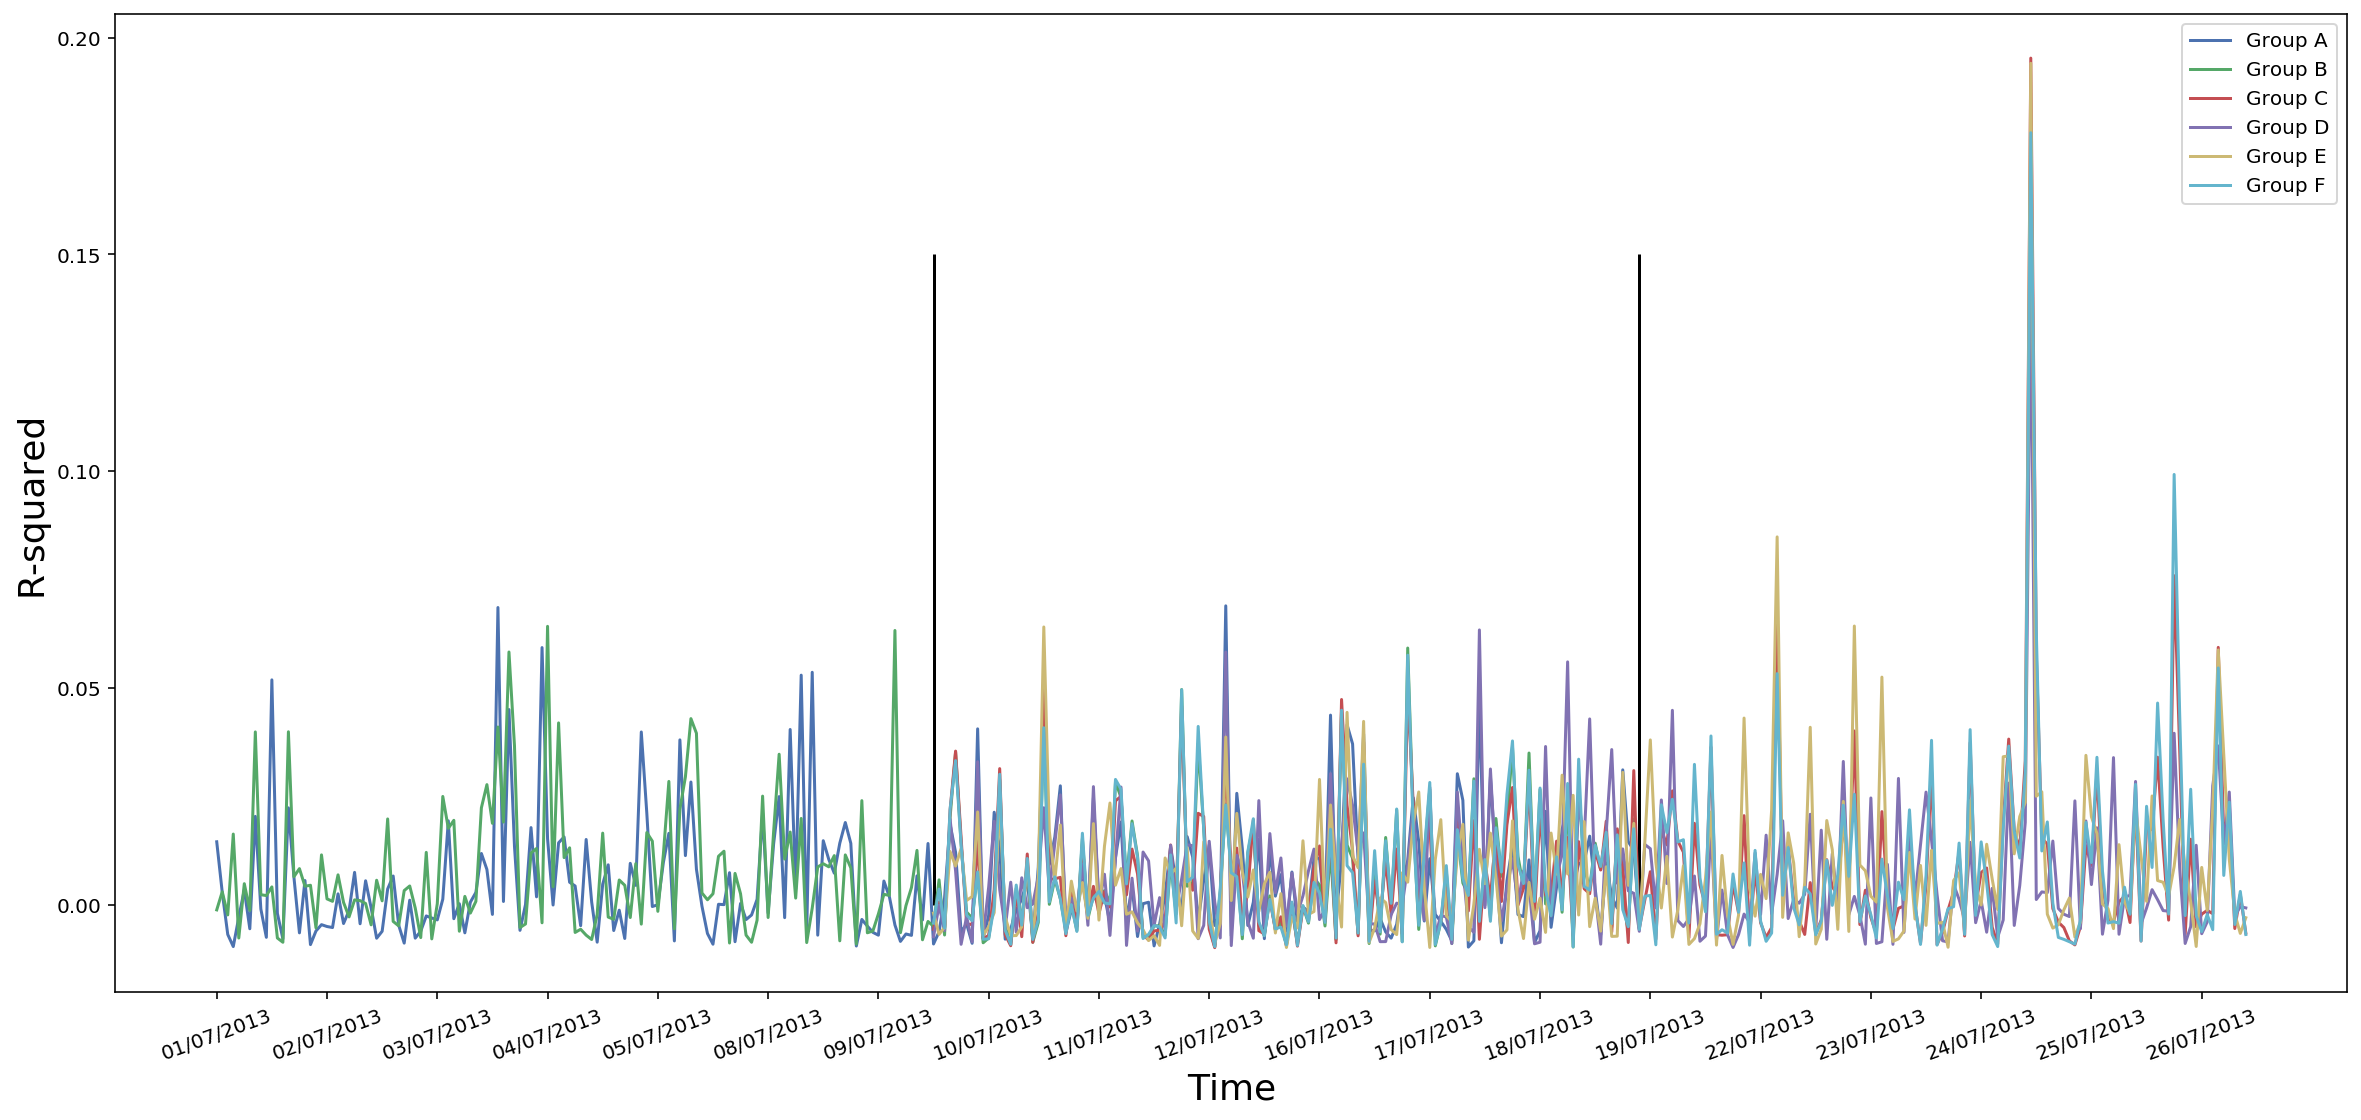

In [6]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(20,9))
# palette = plt.get_cmap('rainbow',7)
# plt.xticks(np.arange(len(price)), price['Date-Time'])
plt.plot(r_sq['R_A1'], label="Group A")#, linewidth=2)
plt.plot(r_sq['R_N1'], label="Group B")#, linewidth=2)
plt.plot(r_sq['R_A2'], label="Group C")
plt.plot(r_sq['R_N2'], label="Group D")
plt.plot(r_sq['R_B12'], label="Group E")
plt.plot(r_sq['R_O2'], label="Group F")
plt.xticks(np.arange(0, len(r_sq), step=20), r_sq.Date, rotation=20)
plt.ylabel('R-squared',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.vlines([130,258],0,0.15)
plt.legend()
plt.savefig('/Volumes/LaCie/reg_Results/r_sq_sum.png',
        orientation='portrait',transparent=True)
plt.show()

## Whole Period

In [2]:
def _wholeperiod(lag,interval):
    def _groupsum(files,groupname,phasename):
        grp_phs_files = []
        for f in files:
            if (groupname in f) & (phasename in f):
                grp_phs_files.append(f)

        pan = pd.DataFrame([])

        for f in grp_phs_files:
            df = pd.read_csv(f).set_index('DateTime')
            pan = pd.concat([pan, df], axis=0)

        path = '/Volumes/LaCie/reg_Panel/%s'%interval
        if not os.path.exists(path):
            os.makedirs(path)
#         pan.to_csv('%s/%s_%s.csv'%(path, groupname, phasename))
    
    files = []
    path = '/Volumes/LaCie/reg_Portfolio/%s'%interval
    for fpathe, dirs,fs in os.walk(path):
        for f in fs: 
            if f[-9:] == 'folio.csv':
                files.append(os.path.join(fpathe,f))

    A1_pre1 = _groupsum(files,'A1','Pre_Phase_1')
    A1_post1 = _groupsum(files,'A1','Post_Phase_1')
    N1_pre1 = _groupsum(files,'N1','Pre_Phase_1')
    N1_post1 = _groupsum(files,'N1','Post_Phase_1')

    A2_pre2 = _groupsum(files,'A2','Pre_Phase_2')
    A2_post2 = _groupsum(files,'A2','Post_Phase_2')
    N2_pre2 = _groupsum(files,'N2','Pre_Phase_2')
    N2_post2 = _groupsum(files,'N2','Post_Phase_2')
    B12_pre2 = _groupsum(files,'B12','Pre_Phase_2')
    B12_post2 = _groupsum(files,'B12','Post_Phase_2')
    O2_pre2 = _groupsum(files,'O2','Pre_Phase_2')
    O2_post2 = _groupsum(files,'O2','Post_Phase_2')
    
    def df_derived_by_shift(df,lag=0,NON_DER=[]):
        df = df.copy()
        if not lag:
            return df
        cols ={}
        for i in range(1,lag+1):
            for x in list(df.columns):
                if x not in NON_DER:
                    if not x in cols:
                        cols[x] = ['{}_{}'.format(x, i)]
                    else:
                        cols[x].append('{}_{}'.format(x, i))
        for k,v in cols.items():
            columns = v
            dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
            i = 1
            for c in columns:
                dfn[c] = df[k].shift(periods=i)
                i+=1
            df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
        return df

    files_1 = []
    path_1 = '/Volumes/LaCie/reg_Panel'#/%s'%interval
    for fpathe, dirs,fs in os.walk(path_1):
        for f in fs:
            if f[-5:] != 'Store':
                files_1.append(os.path.join(fpathe,f))
                
    grp_phs = []; r_sq = []    
    coeff_1=[];coeff_1_t=[];coeff_1_stderr=[];
    coeff_2=[];coeff_2_t=[];coeff_2_stderr=[];
    coeff_3=[];coeff_3_t=[];coeff_3_stderr=[];
    coeff_4=[];coeff_4_t=[];coeff_4_stderr=[];
    coeff_5=[];coeff_5_t=[];coeff_5_stderr=[];
    coeff_6=[];coeff_6_t=[];coeff_6_stderr=[];
    
    pbar = tqdm(files_1)
    for f in pbar:
        df = pd.read_csv(f)
        grp_phs.append(f[25:-4])
        df_lag = df_derived_by_shift(df,lag=lag,NON_DER=[]).dropna()

        model = sm.OLS(df_lag['Portfolio Return'], 
                       sm.add_constant(df_lag[['Portfolio Return_%s'%str(lag), 
                                               'Portfolio Volume Yen_%s'%str(lag),
#                                                'Portfolio Volume_%s'%str(lag),
                                               'Portfolio OIB Yen_%s'%str(lag),
#                                                'Portfolio OIB #_%s'%str(lag),
#                                                'Portfolio OIB shr_%s'%str(lag)
                                              ]]), 
                       missing='drop')
        res = model.fit()
        
        r_sq.append(res.rsquared_adj)
        coeff_1.append(res.params[1])
        coeff_2.append(res.params[2])
        coeff_3.append(res.params[3])
#         coeff_4.append(res.params[4])
#         coeff_5.append(res.params[5])
#         coeff_6.append(res.params[6])
        coeff_1_t.append(res.tvalues[1])
        coeff_2_t.append(res.tvalues[2])
        coeff_3_t.append(res.tvalues[3])
#         coeff_4_t.append(res.tvalues[4])
#         coeff_5_t.append(res.tvalues[5])
#         coeff_6_t.append(res.tvalues[6])
        coeff_1_stderr.append(res.bse[1])
        coeff_2_stderr.append(res.bse[2])
        coeff_3_stderr.append(res.bse[3])

        pbar.set_description("Processing %s"%(f[25:]))
        
    period_sum = pd.DataFrame([])
    period_sum['Group and Period'] = grp_phs
    period_sum['R Squared'] = r_sq
    period_sum['Coeff Ret']=coeff_1; period_sum['T Ret']=coeff_1_t
    period_sum['SE Ret']=coeff_1_stderr
    period_sum['Coeff Vol Yen'] = coeff_2; period_sum['T Vol Yen'] = coeff_2_t
    period_sum['SE Vol Yen'] = coeff_2_stderr
    period_sum['Coeff OIB Yen']=coeff_3; period_sum['T OIB Yen']=coeff_3_t
    period_sum['SE OIB Yen']=coeff_3_stderr
#     period_sum['Coeff OIB #'] = coeff_4; period_sum['T OIB #'] = coeff_4_t
#     period_sum['Coeff Vol']=coeff_5; period_sum['T Vol']=coeff_5_t
#     period_sum['Coeff OIB shr'] = coeff_6; period_sum['T OIB shr'] = coeff_6_t
    period_sum.to_csv('/Volumes/LaCie/Sum_Stat/Whole period_%s.csv'%interval)
    return period_sum

In [3]:
for t in ['01']:#,'05','10','15','30','45','60']:
    _wholeperiod(1,t)

Processing O2_Pre_Phase_2.csv: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s] 


In [23]:
for t in ['01','05','10','15','30','45','60']:
    _wholeperiod(5,t)

Processing O2_Pre_Phase_2.csv: 100%|██████████| 12/12 [00:08<00:00,  1.41it/s] 


,Group and Period,R Squared,Coeff Ret,T Ret,Coeff Vol Yen,T Vol Yen,Coeff OIB Yen,T OIB Yen
0,A1_Post_Phase_1,0.000077,0.012480,2.402479,-0.000007,-0.110977,-1.070071e-11,-0.062616
1,A1_Pre_Phase_1,0.000472,0.020796,4.107835,0.000082,1.810997,8.142296e-11,0.814068
2,A2_Post_Phase_2,0.000127,-0.000818,-0.146308,-0.000208,-2.455020,4.787211e-10,1.085383
3,A2_Pre_Phase_2,0.000282,0.018934,3.725501,0.000006,0.073447,5.168824e-11,0.102220
4,B12_Post_Phase_2,0.000072,0.002651,0.473169,-0.000167,-2.269337,1.369678e-12,0.097652
5,B12_Pre_Phase_2,0.000168,0.012627,2.450461,-0.000080,-0.990657,-2.875676e-11,-1.929609
6,N1_Post_Phase_1,0.000424,0.022214,4.371461,0.000041,0.503082,6.858049e-11,0.174277
7,N1_Pre_Phase_1,0.000645,0.025260,4.988384,0.000148,1.673137,1.813106e-11,0.043734
8,N2_Post_Phase_2,0.000241,-0.000072,-0.012696,-0.000133,-3.097797,-1.240634e-10,-1.130289
9,N2_Pre_Phase_2,0.000085,0.012582,2.417800,0.000021,0.404227,1.455872e-12,0.016260


In [3]:
for t in ['01','05','10','15','30','45','60']:
    _wholeperiod(1,t)

Processing re_Phase_2.csv: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s] 


,Group and Period,R Squared,Coeff Ret,T Ret,Coeff Vol,T Vol,Coeff Yen,T Yen,Coeff OIB #,T OIB #,Coeff OIB shr,T OIB shr,Coeff OIB Yen,T OIB Yen
0,A1_Post_Phase_1,0.001007,-0.021971,-4.101503,3.401352e-07,4.863070,-0.001417,-2.782464,-3.447047e-07,-4.809675,0.000541,1.585047,-2.838506e-10,-1.462152
1,A1_Pre_Phase_1,0.003553,0.056701,11.138705,7.734109e-08,1.038360,0.000112,0.319413,-8.099404e-08,-1.059166,0.000276,1.124263,6.387679e-11,0.615565
2,A2_Post_Phase_2,0.000732,0.015391,2.668942,3.238345e-09,0.157550,0.001793,3.119060,-3.942479e-09,-0.189632,-0.000981,-1.877290,-2.342714e-10,-0.305347
3,A2_Pre_Phase_2,0.000182,0.003800,0.745280,7.207923e-09,0.971390,-0.001520,-2.156940,-6.916918e-09,-0.924733,0.001036,1.500178,-1.165270e-09,-1.338150
4,B12_Post_Phase_2,0.001241,0.006182,1.079218,2.951320e-09,0.096402,-0.003648,-3.787307,1.476055e-08,0.463365,-0.000357,-2.234909,2.550933e-11,1.063452
5,B12_Pre_Phase_2,0.000795,-0.022156,-4.138574,-1.746321e-08,-0.777361,-0.000605,-0.563822,2.157737e-08,0.931127,-0.000380,-2.610451,4.494598e-11,1.948551
6,N1_Post_Phase_1,0.000302,0.012445,2.440706,4.374098e-09,0.927823,-0.001352,-2.369807,-4.134283e-09,-0.868290,0.000885,1.628268,-9.781989e-10,-1.445688
7,N1_Pre_Phase_1,0.005673,0.075181,14.833447,4.201875e-09,0.882952,0.001016,1.755168,-4.349597e-09,-0.904696,-0.000706,-1.280243,7.640552e-10,1.078149
8,N2_Post_Phase_2,0.000946,0.019658,3.397961,-7.432073e-08,-1.020867,0.000298,0.920918,7.923718e-08,1.032832,-0.000191,-1.105869,1.184939e-10,0.935934
9,N2_Pre_Phase_2,0.000569,-0.014631,-2.708407,2.231155e-07,3.981540,-0.001050,-2.726683,-2.296598e-07,-3.890199,0.000393,2.086461,-1.182215e-10,-1.170311


# Panel Analysis

## Time Series Plot

In [ ]:
def _tsplot(style,interval,group,phase,groupname,phasename,ylim):
    tmp_pre = pd.read_csv(
        '/Volumes/LaCie/reg_Panel/%s/%s_Pre_%s.csv'%(interval,group,phase)
        )['Portfolio Illiquidity']
    tmp_post = pd.read_csv(
        '/Volumes/LaCie/reg_Panel/%s/%s_Post_%s.csv'%(interval,group,phase)
        )['Portfolio Illiquidity']
    tmp_post_ = pd.concat([pd.DataFrame([np.nan]*len(tmp_pre)), tmp_post], 
                         axis = 0, ignore_index=True)
#     tmp = pd.concat([tmp_pre, tmp_post], axis = 0, ignore_index=True)
    plt.style.use(style)
    plt.figure(figsize=(20,9))
    plt.title('%s - %s'%(groupname,phasename))
    plt.ylim(0, ylim)
    # plt.xticks(np.arange(len(price)), price['Date-Time'])
    plt.plot(tmp_pre, alpha=0.5, linewidth=0.2)
    plt.plot(tmp_post_,  alpha=0.5, linewidth=0.2)
    plt.hlines(np.nanmean(tmp_pre), 0, len(tmp_pre),  linestyles='solid')
    plt.hlines(np.nanmean(tmp_post_), len(tmp_pre), len(tmp_post_), linestyles='solid')
    plt.savefig('/Volumes/LaCie/ts_plot_%s.png'%group, orientation='portrait')
#     plt.show()

In [ ]:
# Multiple plots
#     fig = plt.figure(constrained_layout=True,figsize=(20,9*6))
#     gs = fig.add_gridspec(6, 1)
#     palette = plt.get_cmap('rainbow',12) 

#     ax1 = fig.add_subplot(gs[0, 0])
#     ax1.set_title('A1')
#     ax1.set_ylim(0, 0.8) 
#     ax1.plot(A1_pre, alpha=0.5, linewidth=0.2, label="A1_pre") 
#     ax1.plot(A1_post_, alpha=0.5, linewidth=0.2, label="A1_post") 
#     ax1.hlines(np.nanmean(A1_pre), 0, len(A1_pre),  linestyles='solid')
#     ax1.hlines(np.nanmean(A1_post_), len(A1_pre), len(A1_post_), linestyles='solid')
#     ax1.legend()

In [ ]:
%%notify
pbar = tqdm(['01','05','10','15','30','45','60'])
for t in pbar:
    _tsplot('seaborn-deep',t,'A1','Phase_1','Group A','Phase 1 - %smin'%t,0.2)
    _tsplot('seaborn-deep',t,'N1','Phase_1','Group B','Phase 1 - %smin'%t,0.8)
    _tsplot('seaborn-deep',t,'A2','Phase_2','Group C','Phase 2 - %smin'%t,0.6)
    _tsplot('seaborn-deep',t,'N2','Phase_2','Group D','Phase 2 - %smin'%t,0.1)
    _tsplot('seaborn-deep',t,'O2','Phase_2','Group E','Phase 2 - %smin'%t,0.8)
    _tsplot('seaborn-deep',t,'B12','Phase_2','Group F','Phase 2 - %smin'%t,0.08)

## Panel Analysis

In [25]:
def _panelfile():
    p1_files =[]
    path_pre = '/Volumes/LaCie/Grouping_1/Pre_Phase_1'
    for fpathe, dirs,fs in os.walk(path_pre):
        for f in fs:
            if f[-5:]!= 'Store':
                p1_files.append(os.path.join(fpathe,f))

    path_post = '/Volumes/LaCie/Grouping_1/Post_Phase_1'
    for fpathe, dirs,fs in os.walk(path_post):
        for f in fs:
            if f[-5:]!= 'Store':
                p1_files.append(os.path.join(fpathe,f))
                
    p2_files =[]
    path_pre = '/Volumes/LaCie/Grouping_1/Pre_Phase_2'
    for fpathe, dirs,fs in os.walk(path_pre):
        for f in fs:
            if f[-5:]!= 'Store':
                p2_files.append(os.path.join(fpathe,f))

    path_post = '/Volumes/LaCie/Grouping_1/Post_Phase_2'
    for fpathe, dirs,fs in os.walk(path_post):
        for f in fs:
            if f[-5:]!= 'Store':
                p2_files.append(os.path.join(fpathe,f))
    
    return(p1_files, p2_files)

In [27]:
def _panel(files,interval,phasename): 
    pan = pd.DataFrame([])
    pbar = tqdm(files)
    for f in pbar:
        df = pd.read_csv(f)[['DateTime','Code',
                             'YZ-%s'%interval,'CC-%s'%interval,'Illiquidity-%s'%interval,
                             'Return-%s'%interval, 'Post 1', 'Post 2',
                             'A_1','A_2','B_12','O_2',
                             '1K','3K','5K','10K','30K','50K','100K']]

        df['Lag Return-%s'%interval] = pd.concat([pd.DataFrame([np.nan]),
                                              df['Return-%s'%interval][:-1]], 
                                              axis = 0).reset_index(drop = True)
        df = df.set_index('DateTime')
        pan= pd.concat([pan,df],axis = 0)
        pbar.set_description("Processing %s - %s" % (phasename, f[-24:-4]))

    savepath = '/Volumes/LaCie/panel_analysis/%s'%interval
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    pan.to_csv('%s/%s.csv'%(savepath,phasename))

In [ ]:
[p1_files, p2_files]=_panelfile()
_panel(p1_files,'15','Phase_1')
_panel(p2_files,'15','Phase_2')

## Define Function for Collecting Panel Analysis Results

In [2]:
# import modules
from statsmodels.compat.python import (lrange, iterkeys, iteritems, lzip,
                                       reduce, itervalues, zip, string_types,
                                       range)
from collections import OrderedDict
import statsmodels

import datetime
import textwrap
from statsmodels.iolib.table import SimpleTable
from statsmodels.iolib.tableformatting import fmt_latex, fmt_txt

In [3]:
class Summary_panel(object):
    def __init__(self):
        self.tables = []
        self.settings = []
        self.extra_txt = []
        self.title = None

    def __str__(self):
        return self.as_text()

    def __repr__(self):
        return str(type(self)) + '\n"""\n' + self.__str__() + '\n"""'

    def _repr_html_(self):
        '''Display as HTML in IPython notebook.'''
        return self.as_html()
    
    def as_text(self):
        '''Generate ASCII Summary Table
        '''

        tables = self.tables
        settings = self.settings
        title = self.title
        extra_txt = self.extra_txt

        pad_col, pad_index, widest = _measure_tables(tables, settings)

        rule_equal = widest * '='
        #TODO: this isn't used anywhere?
        rule_dash = widest * '-'

        simple_tables = _simple_tables(tables, settings, pad_col, pad_index)
        tab = [x.as_text() for x in simple_tables]

        tab = '\n'.join(tab)
        tab = tab.split('\n')
        tab[0] = rule_equal
        tab.append(rule_equal)
        tab = '\n'.join(tab)

        if title is not None:
            title = title
            if len(title) < widest:
                title = ' ' * int(widest/2 - len(title)/2) + title
        else:
            title = ''

        txt = [textwrap.wrap(x, widest) for x in extra_txt]
        txt = ['\n'.join(x) for x in txt]
        txt = '\n'.join(txt)

        out = '\n'.join([title, tab, txt])

        return out

    def as_html(self):
        '''Generate HTML Summary Table
        '''

        tables = self.tables
        settings = self.settings
        #TODO: this isn't used anywhere
        title = self.title

        simple_tables = _simple_tables(tables, settings)
        tab = [x.as_html() for x in simple_tables]
        tab = '\n'.join(tab)

        return tab

    def as_latex(self):
        '''Generate LaTeX Summary Table
        '''
        tables = self.tables
        settings = self.settings
        title = self.title
        if title is not None:
            title = '\\caption{' + title + '} \\\\'
        else:
            title = '\\caption{}'

        simple_tables = _simple_tables(tables, settings)
        tab = [x.as_latex_tabular() for x in simple_tables]
        tab = '\n\\hline\n'.join(tab)

        out = '\\begin{table}', title, tab, '\\end{table}'
        out = '\n'.join(out)
        return out
    
    def add_base(self, results, yname, xname, 
                 alpha=0.05, float_format="%.4f", title=None):
        '''Try to construct a basic summary instance.

        Parameters
        ----------
        results : Model results instance
        alpha : float
            significance level for the confidence intervals (optional)
        float_formatting: string
            Float formatting for summary of parameters (optional)
        title : string
            Title of the summary table (optional)
        xname : List of strings of length equal to the number of parameters
            Names of the independent variables (optional)
        yname : string
            Name of the dependent variable (optional)
        '''

        param = summary_params(results, alpha=alpha, use_t=True)
        info = summary_model(results)
        if xname is not None:
            param.index = xname
        if yname is not None:
            info['Dependent Variable:'] = yname
        self.add_dict(info, align='l')
        self.add_df(param, float_format=float_format)
        self.add_title(title=title, results=results)

    def add_df(self, df, index=True, header=True, float_format='%.4f',
               align='r'):
        '''Add the contents of a DataFrame to summary table

        Parameters
        ----------
        df : DataFrame
        header: bool
            Reproduce the DataFrame column labels in summary table
        index: bool
            Reproduce the DataFrame row labels in summary table
        float_format: string
            Formatting to float data columns
        align : string
            Data alignment (l/c/r)
        '''

        settings = {'index': index, 'header': header,
                    'float_format': float_format, 'align': align}
        self.tables.append(df)
        self.settings.append(settings)

    def add_array(self, array, align='r', float_format="%.4f"):
        '''Add the contents of a Numpy array to summary table

        Parameters
        ----------
        array : numpy array (2D)
        float_format: string
            Formatting to array if type is float
        align : string
            Data alignment (l/c/r)
        '''

        table = pd.DataFrame(array)
        self.add_df(table, index=False, header=False,
                    float_format=float_format, align=align)

    def add_dict(self, d, ncols=2, align='l', float_format="%.4f"):
        '''Add the contents of a Dict to summary table

        Parameters
        ----------
        d : dict
            Keys and values are automatically coerced to strings with str().
            Users are encouraged to format them before using add_dict.
        ncols: int
            Number of columns of the output table
        align : string
            Data alignment (l/c/r)
        '''

        keys = [_formatter(x, float_format) for x in iterkeys(d)]
        vals = [_formatter(x, float_format) for x in itervalues(d)]
        data = np.array(lzip(keys, vals))

        if data.shape[0] % ncols != 0:
            pad = ncols - (data.shape[0] % ncols)
            data = np.vstack([data, np.array(pad * [['', '']])])

        data = np.split(data, ncols)
        data = reduce(lambda x, y: np.hstack([x, y]), data)
        self.add_array(data, align=align)

    def add_text(self, string):
        '''Append a note to the bottom of the summary table. In ASCII tables,
        the note will be wrapped to table width. Notes are not indendented.
        '''
        self.extra_txt.append(string)

    def add_title(self, title=None, results=None):
        '''Insert a title on top of the summary table. If a string is provided
        in the title argument, that string is printed. If no title string is
        provided but a results instance is provided, statsmodels attempts
        to construct a useful title automatically.
        '''
        if isinstance(title, string_types):
            self.title = title
        else:
            try:
                model = results.model.__class__.__name__
#                 if model in _model_types:
#                     model = _model_types[model]
                self.title = 'Results: ' + model
            except:
                self.title = ''

In [4]:
def summary_model_panel(results):
    '''Create a dict with information about the model'''
    
    def time_now(*args, **kwds):
        now = datetime.datetime.now()
        return now.strftime('%Y-%m-%d %H:%M')
    info = OrderedDict()
    info['Model:'] = lambda x: x.model.__class__.__name__
#     info['Model Family:'] = lambda x: x.family.__class.__name__
#     info['Link Function:'] = lambda x: x.family.link.__class__.__name__
    info['Dependent Variable:'] = lambda x: ' '.join(map(str, results.model.dependent.vars))
    info['Date:'] = time_now
    info['No. Observations:'] = lambda x: "%#6d" % x.nobs
    info['Df Model:'] = lambda x: "%#6d" % x.df_model
    info['Df Residuals:'] = lambda x: "%#6d" % x.df_resid
#     info['Converged:'] = lambda x: x.mle_retvals['converged']
#     info['No. Iterations:'] = lambda x: x.mle_retvals['iterations']
    info['Method:'] = lambda x: x.method
#     info['Norm:'] = lambda x: x.fit_options['norm']
#     info['Scale Est.:'] = lambda x: x.fit_options['scale_est']
#     info['Cov. Type:'] = lambda x: x.fit_options['cov']
    info['R-squared:'] = lambda x: "%#8.3f" % x.rsquared
#     info['Adj. R-squared:'] = lambda x: "%#8.3f" % x.rsquared_adj
#     info['Pseudo R-squared:'] = lambda x: "%#8.3f" % x.prsquared
#     info['AIC:'] = lambda x: "%8.4f" % x.aic
#     info['BIC:'] = lambda x: "%8.4f" % x.bic
    info['Log-Likelihood:'] = lambda x: "%#8.5g" % x.loglik
#     info['LL-Null:'] = lambda x: "%#8.5g" % x.llnull
#     info['LLR p-value:'] = lambda x: "%#8.5g" % x.llr_pvalue
#     info['Deviance:'] = lambda x: "%#8.5g" % x.deviance
#     info['Pearson chi2:'] = lambda x: "%#6.3g" % x.pearson_chi2
    info['F-statistic:'] = lambda x: "%#8.4g" % x.f_statistic
#     info['Prob (F-statistic):'] = lambda x: "%#6.3g" % x.f_pvalue
#     info['Scale:'] = lambda x: "%#8.5g" % x.scale
    out = OrderedDict()
    for key, func in iteritems(info):
        try:
            out[key] = func(results)
        # NOTE: some models don't have loglike defined (RLM), so that's NIE
        except (AttributeError, KeyError, NotImplementedError):
            pass
    return out

In [5]:
def summary_params_panel(results, yname=None, xname=None, alpha=.05, use_t=True,
                   skip_header=False, float_format="%.4f"):
    '''create a summary table of parameters from results instance

    Parameters
    ----------
    res : results instance
        some required information is directly taken from the result
        instance
    yname : string or None
        optional name for the endogenous variable, default is "y"
    xname : list of strings or None
        optional names for the exogenous variables, default is "var_xx"
    alpha : float
        significance level for the confidence intervals
    use_t : bool
        indicator whether the p-values are based on the Student-t
        distribution (if True) or on the normal distribution (if False)
    skip_headers : bool
        If false (default), then the header row is added. If true, then no
        header row is added.
    float_format : string
        float formatting options (e.g. ".3g")

    Returns
    -------
    params_table : SimpleTable instance
    '''

    if isinstance(results, tuple):
        results, params, std_errors, tstats, pvalues, conf_int = results
    else:
        params = results.params
        std_errors = results.std_errors
        tstats = results.tstats
        pvalues = results.pvalues
        conf_int = results.conf_int(alpha)

    data = np.array([params, std_errors, tstats, pvalues]).T
    data = np.hstack([data, conf_int])
    data = pd.DataFrame(data)

    if use_t:
        data.columns = ['Coef.', 'Std.Err.', 't', 'P>|t|',
                        '[' + str(alpha/2), str(1-alpha/2) + ']']
    else:
        data.columns = ['Coef.', 'Std.Err.', 'z', 'P>|z|',
                        '[' + str(alpha/2), str(1-alpha/2) + ']']

    if not xname:
        data.index = results.model.exog_names
    else:
        data.index = xname

    return data

In [6]:
def _col_params_panel(result, yname=None, xname=None, float_format='%.4f', stars=True):
    '''Stack coefficients and standard errors in single column
    '''
    # Extract parameters
    res = summary_params_panel(result, yname=yname, xname=xname)
    # Format float
    for col in res.columns[:2]:
        res[col] = res[col].apply(lambda x: float_format % x)
    # Std.Errors in parentheses
    res.ix[:, 1] = '(' + res.ix[:, 1] + ')'
    # Significance stars
    if stars:
        idx = res.ix[:, 3] < .1
        res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
        idx = res.ix[:, 3] < .05
        res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
        idx = res.ix[:, 3] < .01
        res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
    # Stack Coefs and Std.Errors
    res = res.ix[:, :2]
    res = res.stack()
    res = pd.DataFrame(res)
    res.columns = result.model.dependent.vars
    return res

In [7]:
def _col_info_panel(result, info_dict=None):
    '''Stack model info in a column
    '''

    if info_dict is None:
        info_dict = {}
    out = []
    index = []
    for i in info_dict:
        if isinstance(info_dict[i], dict):
            # this is a specific model info_dict, but not for this result...
            continue
        try:
            out.append(info_dict[i](result))
        except:
            out.append('')
        index.append(i)
    out = pd.DataFrame({' '.join(map(str, result.model.dependent.vars)): out}, index=index)
    return out

In [8]:
def _make_unique(list_of_names):
    if len(set(list_of_names)) == len(list_of_names):
        return list_of_names
    # pandas does not like it if multiple columns have the same names
    from collections import defaultdict
    name_counter = defaultdict(str)
    header = []
    for _name in list_of_names:
        name_counter[_name] += "I"
        header.append(_name+" " + name_counter[_name])
    return header

In [9]:
def summary_col_panel(results, yname=None, xname=None, float_format='%.4f', 
                model_names=[], stars=False, info_dict=None, regressor_order=[]):
    """
    Summarize multiple results instances side-by-side (coefs and SEs)

    Parameters
    ----------
    results : statsmodels results instance or list of result instances
    float_format : string
        float format for coefficients and standard errors
        Default : '%.4f'
    model_names : list of strings of length len(results) if the names are not
        unique, a roman number will be appended to all model names
    stars : bool
        print significance stars
    info_dict : dict
        dict of lambda functions to be applied to results instances to retrieve
        model info. To use specific information for different models, add a
        (nested) info_dict with model name as the key.
        Example: `info_dict = {"N":..., "R2": ..., "OLS":{"R2":...}}` would
        only show `R2` for OLS regression models, but additionally `N` for
        all other results.
        Default : None (use the info_dict specified in
        result.default_model_infos, if this property exists)
    regressor_order : list of strings
        list of names of the regressors in the desired order. All regressors
        not specified will be appended to the end of the list.
    """

    if not isinstance(results, list):
        results = [results]

    cols = [_col_params_panel(x, yname=yname, xname=xname, 
                              float_format=float_format,  stars=stars) for x in
            results]

    # Unique column names (pandas has problems merging otherwise)
    if model_names:
        colnames = _make_unique(model_names)
    else:
        colnames = _make_unique([x.columns[0] for x in cols])
    for i in range(len(cols)):
        cols[i].columns = [colnames[i]]

    merg = lambda x, y: x.merge(y, how='outer', right_index=True,
                                left_index=True)
    summ = reduce(merg, cols)

    if regressor_order:
        varnames = summ.index.get_level_values(0).tolist()
        ordered = [x for x in regressor_order if x in varnames]
        unordered = [x for x in varnames if x not in regressor_order + ['']]
        order = ordered + list(np.unique(unordered))

        f = lambda idx: sum([[x + 'coef', x + 'stde'] for x in idx], [])
        summ.index = f(np.unique(varnames))
        summ = summ.reindex(f(order))
        summ.index = [x[:-4] for x in summ.index]

    idx = pd.Series(lrange(summ.shape[0])) % 2 == 1
    summ.index = np.where(idx, '', summ.index.get_level_values(0))

    # add infos about the models.
    if info_dict:
        cols = [_col_info_panel(x, info_dict.get(x.model.__class__.__name__,
                                           info_dict)) for x in results]
    else:
        cols = [_col_info_panel(x, getattr(x, "default_model_infos", None)) for x in
                results]
    # use unique column names, otherwise the merge will not succeed
    for df , name in zip(cols, _make_unique([df.columns[0] for df in cols])):
        df.columns = [name]
    merg = lambda x, y: x.merge(y, how='outer', right_index=True,
                                left_index=True)
    info = reduce(merg, cols)
    dat = pd.DataFrame(np.vstack([summ, info]))  # pd.concat better, but error
    dat.columns = summ.columns
    dat.index = pd.Index(summ.index.tolist() + info.index.tolist())
    summ = dat

    summ = summ.fillna('')

    smry = Summary_panel()
    smry.add_df(summ, header=True, align='l')
    smry.add_text('Standard errors in parentheses.')
    if stars:
        smry.add_text('* p<.1, ** p<.05, ***p<.01')

    return smry

In [10]:
def _measure_tables(tables, settings):
    '''Compare width of ascii tables in a list and calculate padding values.
    We add space to each col_sep to get us as close as possible to the
    width of the largest table. Then, we add a few spaces to the first
    column to pad the rest.
    '''

    simple_tables = _simple_tables(tables, settings)
    tab = [x.as_text() for x in simple_tables]

    length = [len(x.splitlines()[0]) for x in tab]
    len_max = max(length)
    pad_sep = []
    pad_index = []

    for i in range(len(tab)):
        nsep = tables[i].shape[1] - 1
        pad = int((len_max - length[i]) / nsep)
        pad_sep.append(pad)
        len_new = length[i] + nsep * pad
        pad_index.append(len_max - len_new)

    return pad_sep, pad_index, max(length)

def _formatter(element, float_format='%.4f'):
    try:
        out = float_format % element
    except:
        out = str(element)
    return out.strip()

def _df_to_simpletable(df, align='r', float_format="%.4f", header=True,
                       index=True, table_dec_above='-', table_dec_below=None,
                       header_dec_below='-', pad_col=0, pad_index=0):
    dat = df.copy()
    dat = dat.applymap(lambda x: _formatter(x, float_format))
    if header:
        headers = [str(x) for x in dat.columns.tolist()]
    else:
        headers = None
    if index:
        stubs = [str(x) + int(pad_index) * ' ' for x in dat.index.tolist()]
    else:
        dat.ix[:, 0] = [str(x) + int(pad_index) * ' ' for x in dat.ix[:, 0]]
        stubs = None
    st = SimpleTable(np.array(dat), headers=headers, stubs=stubs,
                     ltx_fmt=fmt_latex, txt_fmt=fmt_txt)
    st.output_formats['latex']['data_aligns'] = align
    st.output_formats['txt']['data_aligns'] = align
    st.output_formats['txt']['table_dec_above'] = table_dec_above
    st.output_formats['txt']['table_dec_below'] = table_dec_below
    st.output_formats['txt']['header_dec_below'] = header_dec_below
    st.output_formats['txt']['colsep'] = ' ' * int(pad_col + 1)
    return st

def _simple_tables(tables, settings, pad_col=None, pad_index=None):
    simple_tables = []
    float_format = '%.4f'
    if pad_col is None:
        pad_col = [0] * len(tables)
    if pad_index is None:
        pad_index = [0] * len(tables)
    for i, v in enumerate(tables):
        index = settings[i]['index']
        header = settings[i]['header']
        align = settings[i]['align']
        simple_tables.append(_df_to_simpletable(v, align=align,
                                                float_format=float_format,
                                                header=header, index=index,
                                                pad_col=pad_col[i],
                                                pad_index=pad_index[i]))
    return simple_tables

## Collecting Panel Analysis Results for All Intervals

In [21]:
# Post 1 (Same result with or without constant term)
result_post1 = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_1 = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_1.csv'%t)
    phase_1.iloc[:,0] = pd.to_datetime(pd.Series(phase_1.iloc[:,0]))
    mi_p1 = phase_1.set_index(['Code','DateTime'])
    exog_var_1 = ['Post 1']
    RE_mod_1 = RandomEffects(mi_p1['Illiquidity-%s'%t], mi_p1[exog_var_1])
    RE_mod_1_res = RE_mod_1.fit()
    result_post1.append(RE_mod_1_res)
    
exog_var = ['Post 1']
dfoutput_post1 = summary_col_panel(result_post1, xname=exog_var,stars=True)
dfoutput_post1

100%|██████████| 6/6 [03:22<00:00, 33.80s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 1,-0.0007***,-0.0010***,-0.0013***,-0.0014***,-0.0012***,-0.0011***
,(0.0001),(0.0001),(0.0000),(0.0000),(0.0000),(0.0000)


In [22]:
%%notify
result_post1

[                        RandomEffects Estimation Summary                        
 Dep. Variable:         Illiquidity-05   R-squared:                     3.568e-06
 Estimator:              RandomEffects   R-squared (Between):             -0.0071
 No. Observations:             7005030   R-squared (Within):            3.708e-06
 Date:                Wed, May 06 2020   R-squared (Overall):             -0.0006
 Time:                        14:45:52   Log-likelihood                 2.335e+06
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                      24.992
 Entities:                          93   P-value                           0.0000
 Avg Obs:                    7.532e+04   Distribution:               F(1,7005029)
 Min Obs:                    7.244e+04                                           
 Max Obs:                    7.563e+04   F-statistic (robust):             24.992
                

<IPython.core.display.Javascript object>

In [11]:
# Group 1
result_group1 = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_1 = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_1.csv'%t)
    phase_1.iloc[:,0] = pd.to_datetime(pd.Series(phase_1.iloc[:,0]))
    mi_p1 = phase_1.set_index(['Code','DateTime'])
    mi_p1['Post 1-1K'] = mi_p1['Post 1']*mi_p1['1K']
    mi_p1['Post 1-3K'] = mi_p1['Post 1']*mi_p1['3K']
    mi_p1['Post 1-5K'] = mi_p1['Post 1']*mi_p1['5K']
    mi_p1['Post 1-10K'] = mi_p1['Post 1']*mi_p1['10K']
    mi_p1['Post 1-30K'] = mi_p1['Post 1']*mi_p1['30K']
    mi_p1['Post 1-50K'] = mi_p1['Post 1']*mi_p1['50K']
    mi_p1['Post 1-100K'] = mi_p1['Post 1']*mi_p1['100K']
    exog_var_1 = ['Post 1-1K', 'Post 1-3K', 'Post 1-5K', 
                  'Post 1-10K', 'Post 1-30K', 'Post 1-50K']
    RE_mod_1 = RandomEffects(mi_p1['Illiquidity-%s'%t], mi_p1[exog_var_1])
    RE_mod_1_res = RE_mod_1.fit()
    result_group1.append(RE_mod_1_res)
    
exog_var = ['Post 1-1K', 'Post 1-3K', 'Post 1-5K', 
            'Post 1-10K', 'Post 1-30K', 'Post 1-50K']
dfoutput_group1 = summary_col_panel(result_group1, xname=exog_var,stars=True)
dfoutput_group1

100%|██████████| 6/6 [03:53<00:00, 38.97s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 1-1K,0.0138***,0.0048***,0.0017***,-0.0002***,-0.0004***,-0.0004***
,(0.0003),(0.0001),(0.0001),(0.0000),(0.0000),(0.0000)
Post 1-3K,-0.0019***,-0.0017***,-0.0014***,-0.0010***,-0.0008***,-0.0007***
,(0.0002),(0.0001),(0.0000),(0.0000),(0.0000),(0.0000)
Post 1-5K,-0.0097***,-0.0037***,-0.0025***,-0.0015***,-0.0012***,-0.0010***
,(0.0003),(0.0001),(0.0001),(0.0000),(0.0000),(0.0000)
Post 1-10K,-0.0117***,-0.0051***,-0.0039***,-0.0030***,-0.0024***,-0.0020***
,(0.0004),(0.0001),(0.0001),(0.0000),(0.0000),(0.0000)
Post 1-30K,-0.0049***,-0.0046***,-0.0049***,-0.0050***,-0.0046***,-0.0040***
,(0.0005),(0.0002),(0.0001),(0.0001),(0.0000),(0.0000)


In [12]:
%%notify
result_group1

[                        RandomEffects Estimation Summary                        
 Dep. Variable:         Illiquidity-05   R-squared:                        0.0007
 Estimator:              RandomEffects   R-squared (Between):              0.0424
 No. Observations:             7005030   R-squared (Within):               0.0007
 Date:                Mon, May 11 2020   R-squared (Overall):              0.0044
 Time:                        16:26:32   Log-likelihood                 2.338e+06
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                      849.94
 Entities:                          93   P-value                           0.0000
 Avg Obs:                    7.532e+04   Distribution:               F(6,7005024)
 Min Obs:                    7.244e+04                                           
 Max Obs:                    7.563e+04   F-statistic (robust):             849.94
                

<IPython.core.display.Javascript object>

In [17]:
# Post 2 
result_post2 = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_2 = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_2.csv'%t)
    phase_2.iloc[:,0] = pd.to_datetime(pd.Series(phase_2.iloc[:,0]))
    mi_p2 = phase_2.set_index(['Code','DateTime'])
    exog_var_2 = ['Post 2']
    RE_mod_2 = RandomEffects(mi_p2['Illiquidity-%s'%t], mi_p2[exog_var_2])
    RE_mod_2_res = RE_mod_2.fit()
    result_post2.append(RE_mod_2_res)
    
exog_var = ['Post 2']
dfoutput_post2 = summary_col_panel(result_post2, xname=exog_var,stars=True)
dfoutput_post2

100%|██████████| 6/6 [05:42<00:00, 57.11s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 2,-0.0184***,-0.0071***,-0.0039***,-0.0016***,-0.0010***,-0.0008***
,(0.0001),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)


In [18]:
%%notify
result_post2

[                        RandomEffects Estimation Summary                        
 Dep. Variable:         Illiquidity-05   R-squared:                        0.0032
 Estimator:              RandomEffects   R-squared (Between):             -0.3178
 No. Observations:            11625336   R-squared (Within):               0.0032
 Date:                Wed, May 06 2020   R-squared (Overall):             -0.0143
 Time:                        14:33:34   Log-likelihood                 4.639e+06
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                   3.688e+04
 Entities:                          93   P-value                           0.0000
 Avg Obs:                     1.25e+05   Distribution:              F(1,11625335)
 Min Obs:                    6.838e+04                                           
 Max Obs:                    1.396e+05   F-statistic (robust):          3.688e+04
                

In [13]:
# Group 2 
result_group2 = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_2 = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_2.csv'%t)
    phase_2.iloc[:,0] = pd.to_datetime(pd.Series(phase_2.iloc[:,0]))
    mi_p2 = phase_2.set_index(['Code','DateTime'])
    mi_p2['Post 2-1K'] = mi_p2['Post 2']*mi_p2['1K']
    mi_p2['Post 2-3K'] = mi_p2['Post 2']*mi_p2['3K']
    mi_p2['Post 2-5K'] = mi_p2['Post 2']*mi_p2['5K']
    mi_p2['Post 2-10K'] = mi_p2['Post 2']*mi_p2['10K']
    mi_p2['Post 2-30K'] = mi_p2['Post 2']*mi_p2['30K']
    mi_p2['Post 2-50K'] = mi_p2['Post 2']*mi_p2['50K']
    exog_var_2 = ['Post 2-1K', 'Post 2-3K', 'Post 2-5K',
                  'Post 2-10K', 'Post 2-30K', 'Post 2-50K']
    RE_mod_2 = RandomEffects(mi_p2['Illiquidity-%s'%t], mi_p2[exog_var_2])
    RE_mod_2_res = RE_mod_2.fit()
    result_group2.append(RE_mod_2_res)
    
exog_var = ['Post 2-1K', 'Post 2-3K', 'Post 2-5K', 
            'Post 2-10K', 'Post 2-30K', 'Post 2-50K']
dfoutput_group2 = summary_col_panel(result_group2, xname=exog_var,stars=True)
dfoutput_group2

100%|██████████| 6/6 [06:31<00:00, 65.28s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 2-1K,-0.0580***,-0.0203***,-0.0099***,-0.0030***,-0.0016***,-0.0010***
,(0.0002),(0.0001),(0.0000),(0.0000),(0.0000),(0.0000)
Post 2-3K,-0.0063***,-0.0030***,-0.0020***,-0.0012***,-0.0009***,-0.0007***
,(0.0001),(0.0001),(0.0000),(0.0000),(0.0000),(0.0000)
Post 2-5K,-0.0039***,-0.0022***,-0.0017***,-0.0011***,-0.0008***,-0.0007***
,(0.0002),(0.0001),(0.0000),(0.0000),(0.0000),(0.0000)
Post 2-10K,-0.0024***,-0.0015***,-0.0012***,-0.0008***,-0.0007***,-0.0006***
,(0.0004),(0.0001),(0.0001),(0.0000),(0.0000),(0.0000)
Post 2-30K,-0.0044***,-0.0028***,-0.0021***,-0.0013***,-0.0010***,-0.0008***
,(0.0005),(0.0002),(0.0001),(0.0000),(0.0000),(0.0000)


In [14]:
%%notify
result_group2

[                        RandomEffects Estimation Summary                        
 Dep. Variable:         Illiquidity-05   R-squared:                        0.0084
 Estimator:              RandomEffects   R-squared (Between):             -0.5490
 No. Observations:            11625336   R-squared (Within):               0.0084
 Date:                Mon, May 11 2020   R-squared (Overall):             -0.0237
 Time:                        16:33:00   Log-likelihood                 4.669e+06
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                   1.636e+04
 Entities:                          93   P-value                           0.0000
 Avg Obs:                     1.25e+05   Distribution:              F(6,11625330)
 Min Obs:                    6.838e+04                                           
 Max Obs:                    1.396e+05   F-statistic (robust):          1.636e+04
                

<IPython.core.display.Javascript object>

## Counting Number of Firms in Each Price Stage

In [2]:
from pathlib import Path

folder = []
for phase in ['Pre_Phase_1','Post_Phase_1','Post_Phase_2']:
    basepath = '/Volumes/LaCie/Processed/%s'%phase
    for date in os.listdir(basepath):
        if os.path.isdir(os.path.join(basepath, date)):
            folder.append(basepath +'/'+ date)

In [3]:
counter = pd.DataFrame({'Group':['G1','G2','G3','G4','G5','G6','G7']})
pbar = tqdm (folder)
for fldr in pbar:
    files =[]
    path = fldr
    for fpathe, dirs,fs in os.walk(path):
        for f in fs:
            if f[-5:]!= 'Store':
                files.append(os.path.join(fpathe,f))
                
    code = [];G1 =[];G2 =[];G3 =[];G4 =[];G5 =[];G6 =[];G7 =[]
    for i in files:
        df = pd.read_csv(i)[['Code','Close']]
        df.dropna(subset = ['Close'], inplace=True)
        df.reset_index(inplace = True)
        code.append(df['Code'][1])
        if df['Close'][1] <= 1000:
            G1.append(1)
            G2.append(0)
            G3.append(0)
            G4.append(0)
            G5.append(0)
            G6.append(0)
            G7.append(0)
        elif df['Close'][1] <= 3000:
            G1.append(0)
            G2.append(1)
            G3.append(0)
            G4.append(0)
            G5.append(0)
            G6.append(0)
            G7.append(0)
        elif df['Close'][1] <= 5000:
            G1.append(0)
            G2.append(0)
            G3.append(1)
            G4.append(0)
            G5.append(0)
            G6.append(0)
            G7.append(0)
        elif df['Close'][1] <= 10000:
            G1.append(0)
            G2.append(0)
            G3.append(0)
            G4.append(1)
            G5.append(0)
            G6.append(0)
            G7.append(0)
        elif df['Close'][1] <= 30000:
            G1.append(0)
            G2.append(0)
            G3.append(0)
            G4.append(0)
            G5.append(1)
            G6.append(0)
            G7.append(0)
        elif df['Close'][1] <= 50000:
            G1.append(0)
            G2.append(0)
            G3.append(0)
            G4.append(0)
            G5.append(0)
            G6.append(1)
            G7.append(0)
        elif df['Close'][1] <= 100000:
            G1.append(0)
            G2.append(0)
            G3.append(0)
            G4.append(0)
            G5.append(0)
            G6.append(0)
            G7.append(1)

    count = pd.DataFrame({'Code':code,
                          'G1':G1,'G2':G2,'G3':G3,'G4':G4,'G5':G5,'G6':G6,'G7':G7}) 

    num = count.sum(axis=0).values.tolist()
    
    counter['%s'%fldr[-10:]] = num[1:]

100%|██████████| 369/369 [29:50<00:00,  4.85s/it]


In [6]:
counter.to_csv('/Volumes/LaCie/Sum_Stat/number.csv', index=False)

## Testing

In [ ]:
import pandas as pd
from linearmodels.panel import RandomEffects
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE
t = '05'; ph = '1'
phase = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/phase_%s.csv'%(t,ph))
phase.iloc[:,0] = pd.to_datetime(pd.Series(phase.iloc[:,0]))
mi = phase.set_index(['Code','DateTime'])
mi['Post %s-1K'%ph] = mi['Post %s'%ph]*mi['1K']
mi['Post %s-3K'%ph] = mi['Post %s'%ph]*mi['3K']
mi['Post %s-5K'%ph] = mi['Post %s'%ph]*mi['5K']
mi['Post %s-10K'%ph] = mi['Post %s'%ph]*mi['10K']
mi['Post %s-30K'%ph] = mi['Post %s'%ph]*mi['30K']
mi['Post %s-50K'%ph] = mi['Post %s'%ph]*mi['50K']

exog_var = ['Post %s'%ph, 
            'Post %s-3K'%ph, 'Post %s-5K'%ph, 
            'Post %s-10K'%ph, 'Post %s-30K'%ph, 'Post %s-50K'%ph]
# ivmod = IV2SLS(data.ldrugexp, data[controls], data.hi_empunion, data.ssiratio)
# ivolsmod = IV2SLS(data.ldrugexp, data[['hi_empunion'] + controls], None, None)

ivolsmod = IV2SLS(mi['Illiquidity-%s'%t], mi[exog_var], 
                  mi['Post 1-1K'],mi['Return-05'])
res_ols = ivolsmod.fit()
res_ols.wu_hausman()

from collections import OrderedDict
from linearmodels.iv.results import compare
res = OrderedDict()
res['OLS'] = res_ols
# res['2SLS'] = res_2sls
# res['2SLS-Homo'] = res_2sls_std
# res['2SLS-Hetero'] = res_2sls_robust
# res['GMM'] = res_gmm
# res['GMM Cluster(Age)'] = res_gmm_clustered
# res['GMM-CUE'] = res_gmm_cue
# print(compare(res))

## Random Effect Model for a Single Time Interval

In [8]:
%%notify
phase_1 = pd.read_csv('/Volumes/LaCie/panel_analysis/Phase_1.csv')
phase_1.iloc[:,0] = pd.to_datetime(pd.Series(phase_1.iloc[:,0]))
mi_p1 = phase_1.set_index(['Code','DateTime'])

<IPython.core.display.Javascript object>

In [15]:
%%notify
mi_p1['Post 1-A'] = mi_p1['Post 1']*mi_p1['A_1']
mi_p1['Post 1-1K'] = mi_p1['Post 1']*mi_p1['1K']
mi_p1['Post 1-3K'] = mi_p1['Post 1']*mi_p1['3K']
mi_p1['Post 1-5K'] = mi_p1['Post 1']*mi_p1['5K']
mi_p1['Post 1-10K'] = mi_p1['Post 1']*mi_p1['10K']
mi_p1['Post 1-30K'] = mi_p1['Post 1']*mi_p1['30K']
mi_p1['Post 1-50K'] = mi_p1['Post 1']*mi_p1['50K']
mi_p1['Post 1-100K'] = mi_p1['Post 1']*mi_p1['100K']

<IPython.core.display.Javascript object>

In [16]:
%%notify
exog_var = ['Post 1', 
            'Post 1-5K', 'Post 1-10K', 'Post 1-30K', 'Post 1-50K',
            'Lag Return-05']
RE_mod_1 = RandomEffects(mi_p1['Illiquidity-05'], mi_p1[exog_var])
RE_mod_1_res = RE_mod_1.fit()
print(RE_mod_1_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:         Illiquidity-05   R-squared:                        0.0004
Estimator:              RandomEffects   R-squared (Between):              0.0129
No. Observations:             6957067   R-squared (Within):               0.0004
Date:                Wed, Apr 29 2020   R-squared (Overall):              0.0015
Time:                        14:28:32   Log-likelihood                 2.316e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      471.20
Entities:                          93   P-value                           0.0000
Avg Obs:                    7.481e+04   Distribution:               F(6,6957061)
Min Obs:                    7.192e+04                                           
Max Obs:                    7.511e+04   F-statistic (robust):             471.20
                            

<IPython.core.display.Javascript object>

In [57]:
%%notify
phase_2 = pd.read_csv('/Volumes/LaCie/panel_analysis/Phase_2.csv')
phase_2.iloc[:,0] = pd.to_datetime(pd.Series(phase_2.iloc[:,0]))
mi_p2 = phase_2.set_index(['Code','DateTime'])
mi_p2['Post 2-A'] = mi_p2['Post 2']*mi_p2['A_2']
mi_p2['Post 2-B'] = mi_p2['Post 2']*mi_p2['B_12']
mi_p2['Post 2-O'] = mi_p2['Post 2']*mi_p2['O_2']
mi_p2['Post 2-1K'] = mi_p2['Post 2']*mi_p2['1K']
mi_p2['Post 2-3K'] = mi_p2['Post 2']*mi_p2['3K']
mi_p2['Post 2-5K'] = mi_p2['Post 2']*mi_p2['5K']
mi_p2['Post 2-10K'] = mi_p2['Post 2']*mi_p2['10K']
mi_p2['Post 2-30K'] = mi_p2['Post 2']*mi_p2['30K']
mi_p2['Post 2-50K'] = mi_p2['Post 2']*mi_p2['50K']

<IPython.core.display.Javascript object>

In [62]:
%%notify
exog_var = ['Post 2', 
            'Post 2-1K', 'Post 2-3K', 'Post 2-5K',
            'Lag Return-05']
RE_mod_2 = RandomEffects(mi_p2['Illiquidity-05'], mi_p2[exog_var])
print(RE_mod_2.fit())

                        RandomEffects Estimation Summary                        
Dep. Variable:         Illiquidity-05   R-squared:                        0.0085
Estimator:              RandomEffects   R-squared (Between):             -0.5506
No. Observations:            11545936   R-squared (Within):               0.0085
Date:                Tue, Feb 04 2020   R-squared (Overall):             -0.0238
Time:                        13:59:23   Log-likelihood                 4.639e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                    1.97e+04
Entities:                          93   P-value                           0.0000
Avg Obs:                    1.241e+05   Distribution:              F(5,11545931)
Min Obs:                    6.791e+04                                           
Max Obs:                    1.386e+05   F-statistic (robust):           1.97e+04
                            

<IPython.core.display.Javascript object>

## Fama-MacBeth Model

In [11]:
# Post 2 
result_2_FM = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_2_FM = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_2.csv'%t)
    phase_2_FM.iloc[:,0] = pd.to_datetime(pd.Series(phase_2_FM.iloc[:,0]))
    mi_p2 = phase_2_FM.set_index(['Code','DateTime'])
    mi_p2['Post 2-A'] = mi_p2['Post 2']*mi_p2['A_2']
    mi_p2['Post 2-B'] = mi_p2['Post 2']*mi_p2['B_12']
    mi_p2['Post 2-O'] = mi_p2['Post 2']*mi_p2['O_2']
    mi_p2['Post 2-1K'] = mi_p2['Post 2']*mi_p2['1K']
    mi_p2['Post 2-3K'] = mi_p2['Post 2']*mi_p2['3K']
    mi_p2['Post 2-5K'] = mi_p2['Post 2']*mi_p2['5K']
    mi_p2['Post 2-10K'] = mi_p2['Post 2']*mi_p2['10K']
    mi_p2['Post 2-30K'] = mi_p2['Post 2']*mi_p2['30K']
    mi_p2['Post 2-50K'] = mi_p2['Post 2']*mi_p2['50K']
    exog_var_2 = ['Post 2']
#                   ,'Post 2-1K', 'Post 2-3K', 'Post 2-5K', 'Lag Return-%s'%t]
    FM_mod_2 = FamaMacBeth(mi_p2['Illiquidity-%s'%t], mi_p2[exog_var_2])
    FM_mod_2_res = FM_mod_2.fit()
    result_2_FM.append(FM_mod_2_res)
    
# exog_var = ['Post 2', 'Post 2-1K', 'Post 2-3K', 'Post 2-5K', 'Lag Return']
exog_var = ['Post 2']
dfoutput_p2_FM = summary_col_panel(result_2_FM, xname=exog_var,stars=True)
dfoutput_p2_FM

100%|██████████| 6/6 [11:44<00:00, 117.45s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 2,0.0146***,0.0096***,0.0076***,0.0052***,0.0042***,0.0036***
,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)


In [12]:
%%notify
result_2_FM

[                          FamaMacBeth Estimation Summary                          
 Dep. Variable:           Illiquidity-05   R-squared:                        0.0035
 Estimator:                  FamaMacBeth   R-squared (Between):              0.1834
 No. Observations:              11625336   R-squared (Within):              -0.0070
 Date:                  Fri, May 08 2020   R-squared (Overall):              0.0035
 Time:                          10:33:00   Log-likelihood                 4.299e+06
 Cov. Estimator:    Fama-MacBeth Std Cov                                           
                                           F-statistic:                   4.073e+04
 Entities:                            93   P-value                           0.0000
 Avg Obs:                       1.25e+05   Distribution:              F(1,11625335)
 Min Obs:                      6.838e+04                                           
 Max Obs:                      1.396e+05   F-statistic (robust):          1.

<IPython.core.display.Javascript object>

In [12]:
# Whole 2 
result_w2_FM = []
pbar = tqdm(['05','10','15','30','45','60'])
for t in pbar:
    phase_w2_FM = pd.read_csv('/Volumes/LaCie/panel_analysis/%s/Phase_2.csv'%t)
    phase_w2_FM.iloc[:,0] = pd.to_datetime(pd.Series(phase_w2_FM.iloc[:,0]))
    mi_p2 = phase_w2_FM.set_index(['Code','DateTime'])
    mi_p2['Post 2-A'] = mi_p2['Post 2']*mi_p2['A_2']
    mi_p2['Post 2-B'] = mi_p2['Post 2']*mi_p2['B_12']
    mi_p2['Post 2-O'] = mi_p2['Post 2']*mi_p2['O_2']
    mi_p2['Post 2-1K'] = mi_p2['Post 2']*mi_p2['1K']
    mi_p2['Post 2-3K'] = mi_p2['Post 2']*mi_p2['3K']
    mi_p2['Post 2-5K'] = mi_p2['Post 2']*mi_p2['5K']
    mi_p2['Post 2-10K'] = mi_p2['Post 2']*mi_p2['10K']
    mi_p2['Post 2-30K'] = mi_p2['Post 2']*mi_p2['30K']
    mi_p2['Post 2-50K'] = mi_p2['Post 2']*mi_p2['50K']
    exog_var_w2 = ['Post 2','Post 2-1K', 'Post 2-3K', 'Lag Return-%s'%t]
    FM_mod_w2 = FamaMacBeth(mi_p2['Illiquidity-%s'%t], mi_p2[exog_var_w2])
    FM_mod_w2_res = FM_mod_w2.fit()
    result_w2_FM.append(FM_mod_w2_res)
    
# exog_var = ['Post 2', 'Post 2-1K', 'Post 2-3K', 'Post 2-5K', 'Lag Return']
exog_var = ['Post 2', 'Post 2-1K', 'Post 2-3K', 'Lag Return']
dfoutput_wp2_FM = summary_col_panel(result_w2_FM, xname=exog_var,stars=True)
dfoutput_wp2_FM


100%|██████████| 6/6 [11:55<00:00, 119.24s/it]


,Illiquidity-05,Illiquidity-10,Illiquidity-15,Illiquidity-30,Illiquidity-45,Illiquidity-60
Post 2,0.0086***,0.0051***,0.0039***,0.0025***,0.0020***,0.0017***
,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)
Post 2-1K,0.0053***,0.0033***,0.0025***,0.0017***,0.0013***,0.0011***
,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)
Post 2-3K,0.0075***,0.0047***,0.0037***,0.0025***,0.0020***,0.0017***
,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)
Lag Return,-0.1570***,-0.1124***,-0.0790***,-0.0378***,-0.0215***,-0.0197***
,(0.0297),(0.0169),(0.0119),(0.0065),(0.0047),(0.0038)


In [13]:
%%notify
result_w2_FM

[                          FamaMacBeth Estimation Summary                          
 Dep. Variable:           Illiquidity-05   R-squared:                        0.0036
 Estimator:                  FamaMacBeth   R-squared (Between):              0.1723
 No. Observations:              11545936   R-squared (Within):              -0.0064
 Date:                  Fri, May 08 2020   R-squared (Overall):              0.0036
 Time:                          10:52:54   Log-likelihood                  4.27e+06
 Cov. Estimator:    Fama-MacBeth Std Cov                                           
                                           F-statistic:                   1.047e+04
 Entities:                            93   P-value                           0.0000
 Avg Obs:                      1.241e+05   Distribution:              F(4,11545932)
 Min Obs:                      6.791e+04                                           
 Max Obs:                      1.386e+05   F-statistic (robust):          3.

<IPython.core.display.Javascript object>

# Gathering $R^2$ and Coefficients

In [94]:
def crs_regression(time, f):
    df = pd.read_csv(f)[
        ['Tick Size-%s'%time, 'Transactions-%s'%time,'Volume-%s'%time,'Volume Yen-%s'%time,
         'Illiquidity-%s'%time,'Return Volatility-%s'%time,
         'Return-%s'%time,'OIB #-%s'%time,'OIB shr-%s'%time,'OIB Yen-%s'%time]]
    
    def df_derived_by_shift(df,lag=0,NON_DER=[]):
        df = df.copy()
        if not lag:
            return df
        cols ={}
        for i in range(1,lag+1):
            for x in list(df.columns):
                if x not in NON_DER:
                    if not x in cols:
                        cols[x] = ['{}_{}'.format(x, i)]
                    else:
                        cols[x].append('{}_{}'.format(x, i))
        for k,v in cols.items():
            columns = v
            dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
            i = 1
            for c in columns:
                dfn[c] = df[k].shift(periods=i)
                i+=1
            df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
        return df
    
    df_lag = df_derived_by_shift(df,lag=1, NON_DER=df.iloc[:,:-4]).dropna()

    model = sm.OLS(df_lag['Return-%s'%time], 
                   sm.add_constant(df_lag[['Return-%s_1'%time, 'OIB #-%s_1'%time]]), 
                   missing='drop')
    res = model.fit()
    
    r_sq = res.rsquared_adj
    coeff_1 = res.params[1]
    coeff_2 = res.params[2]
    coeff_1_t = res.tvalues[1] 
    coeff_2_t = res.tvalues[2]
    
    return [r_sq, coeff_1, coeff_2, coeff_1_t, coeff_2_t]

In [54]:
%%notify
files =[]
path = '/Volumes/LaCie/Time_interval_processed'
for fpathe, dirs,fs in os.walk(path):
    for f in fs:
        if f[-5:]!= 'Store':
            files.append(os.path.join(fpathe,f))

<IPython.core.display.Javascript object>

In [113]:
files[1][39:-10]

'Post_Phase_1/20140114'

In [55]:
dates=[]
for entry in os.listdir(path):
    if os.path.isdir(os.path.join(path, entry)):
        subpath = os.path.join(path, entry)
        for entry_2 in os.listdir(subpath):
            if os.path.isdir(os.path.join(subpath, entry_2)):
                dates.append(entry_2)
dates.sort()

In [56]:
all_co = pd.read_csv('/Volumes/LaCie/TOPIX100_list_2014.csv')['Code'].sort_values()
all_co.reset_index(inplace=True, drop=True)
all_co = list(all_co)
all_co = pd.DataFrame(columns=all_co)

In [104]:
a = '/Volumes/LaCie/Transactions_2013/07/01/16050.csv'

In [95]:
r_2_sum = pd.concat([pd.DataFrame({'Date':dates}),all_co])
coeff_ret_sum = pd.concat([pd.DataFrame({'Date':dates}),all_co])
coeff_oib_sum = pd.concat([pd.DataFrame({'Date':dates}),all_co])
coeff_ret_t_sum = pd.concat([pd.DataFrame({'Date':dates}),all_co])
coeff_oib_t_sum = pd.concat([pd.DataFrame({'Date':dates}),all_co])

In [109]:
del(a)

In [96]:
%%notify
pbar = tqdm(files)
for f in pbar:
    [r_sq, coeff_1, coeff_2, coeff_1_t, coeff_2_t] = crs_regression('05', f)
    r_2_sum[int(f[-9:-4])].loc[r_2_sum['Date']==f[-18:-10]] = r_sq
    coeff_ret_sum[int(f[-9:-4])].loc[coeff_ret_sum['Date']==f[-18:-10]] = coeff_1
    coeff_oib_sum[int(f[-9:-4])].loc[coeff_oib_sum['Date']==f[-18:-10]] = coeff_2
    coeff_ret_t_sum[int(f[-9:-4])].loc[coeff_ret_t_sum['Date']==f[-18:-10]] = coeff_1_t
    coeff_oib_t_sum[int(f[-9:-4])].loc[coeff_oib_t_sum['Date']==f[-18:-10]] = coeff_2_t
    pbar.set_description("Processing %s" % f[-31:])

Processing /Pre_Phase_1/20140110/99840.csv: 100%|██████████| 34307/34307 [27:39<00:00, 20.67it/s]


<IPython.core.display.Javascript object>